In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import numpy as np
import astropy.units as u
from datetime import date
from random import choices
from math import factorial, erf
from astroquery.simbad import Simbad
import matplotlib.gridspec as gridspec
from scipy.ndimage import gaussian_filter1d
from sklearn.neighbors import KernelDensity
from scipy.integrate import simps
from matplotlib.ticker import AutoMinorLocator

plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [128]:
posteriors_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Tables/Probability_Distributions/High/'


In [129]:
files = []
titles = []
for file in os.listdir(posteriors_directory):
    if ('.csv' in file) and ('Rough' in file) and ('stassun' not in file) and('all' not in file):
        files.append(file)
        titles.append(file.split('_')[-1][:-4])
        

In [130]:
x_head = 'i (deg)'
y_head1 = 'P(i Disk | d)'
y_head2 = 'P(i Star | d)'
y_head3 = 'P(Delta i | d)'

dx:  0.01 



/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_6555/515561247.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  quickfig = plt.figure(figsize=(12, 4), dpi=150)
/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_6555/515561247.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  quickfig.show()


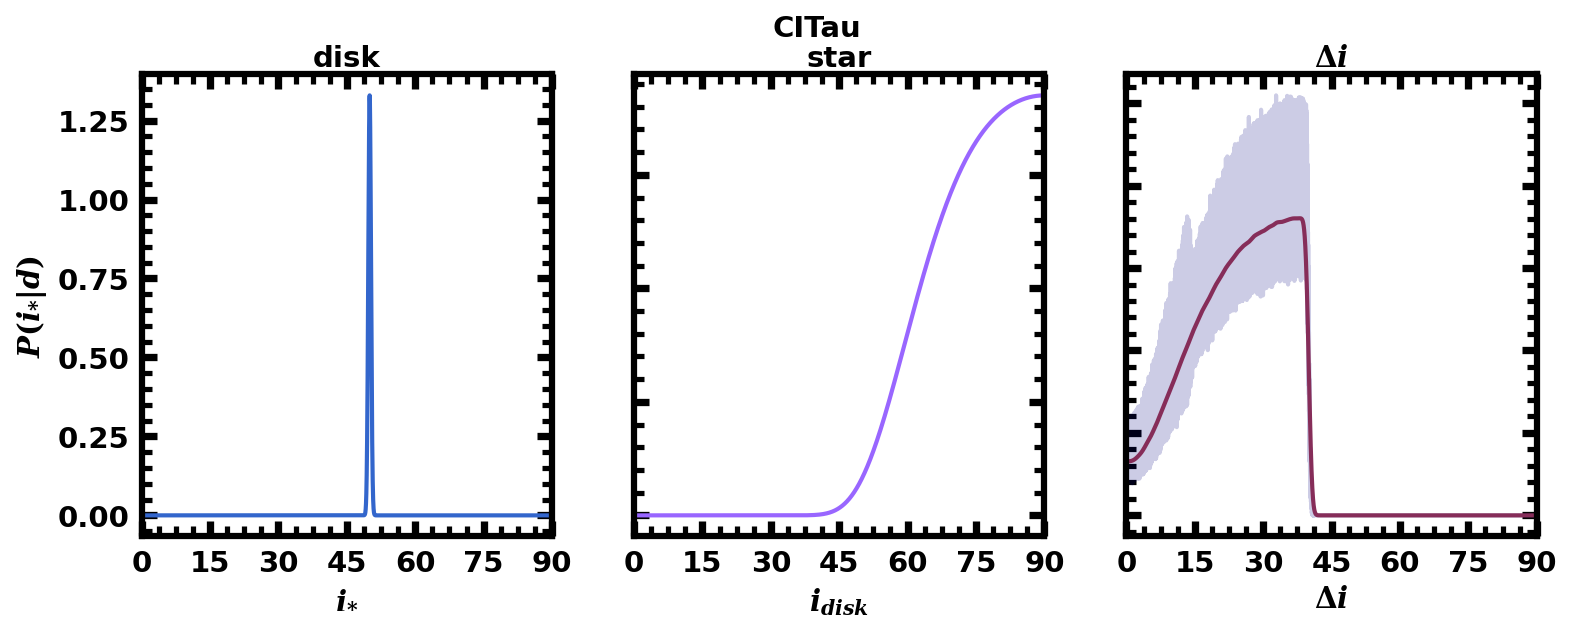

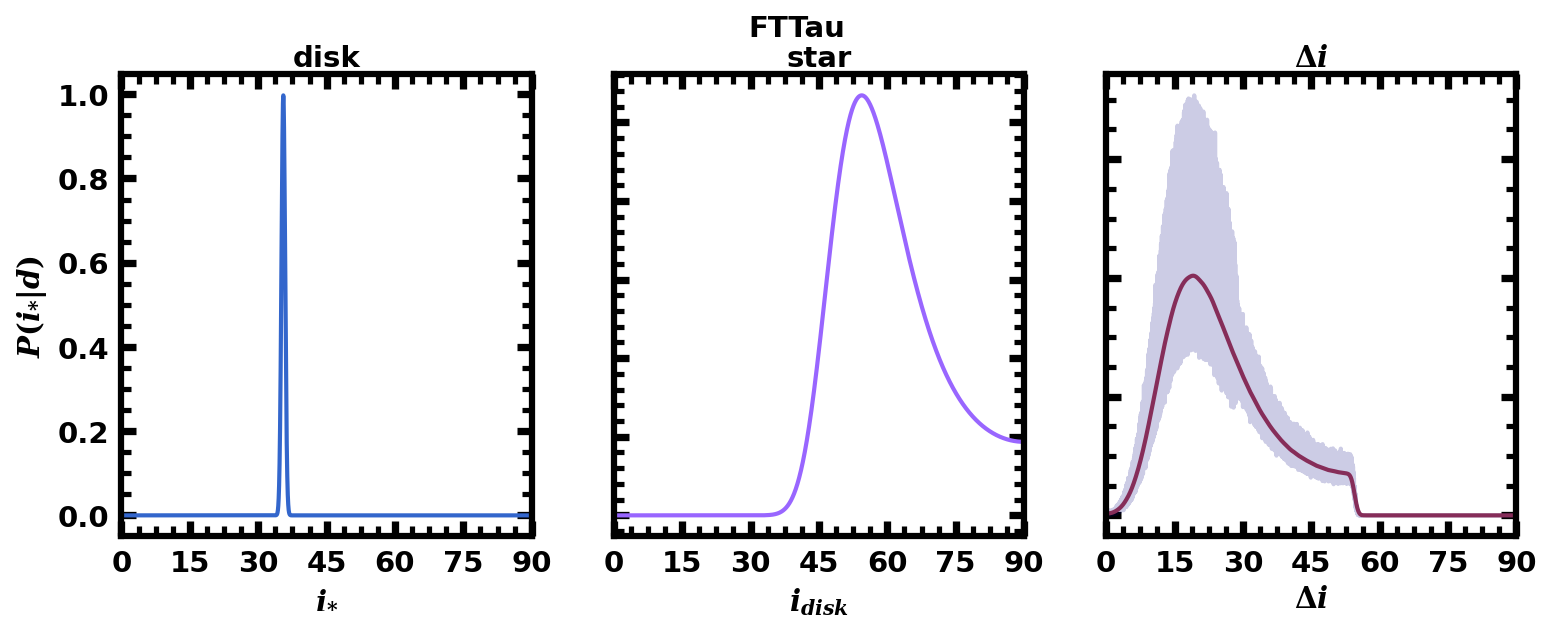

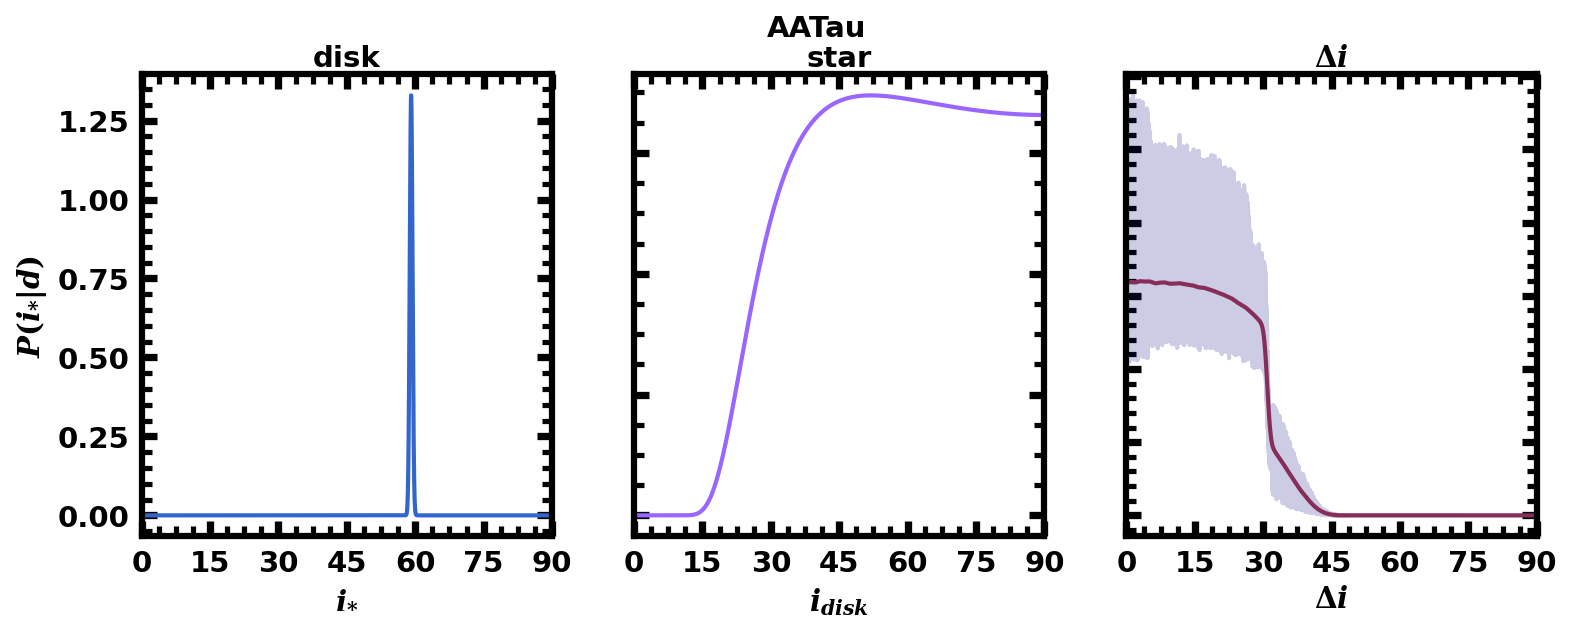

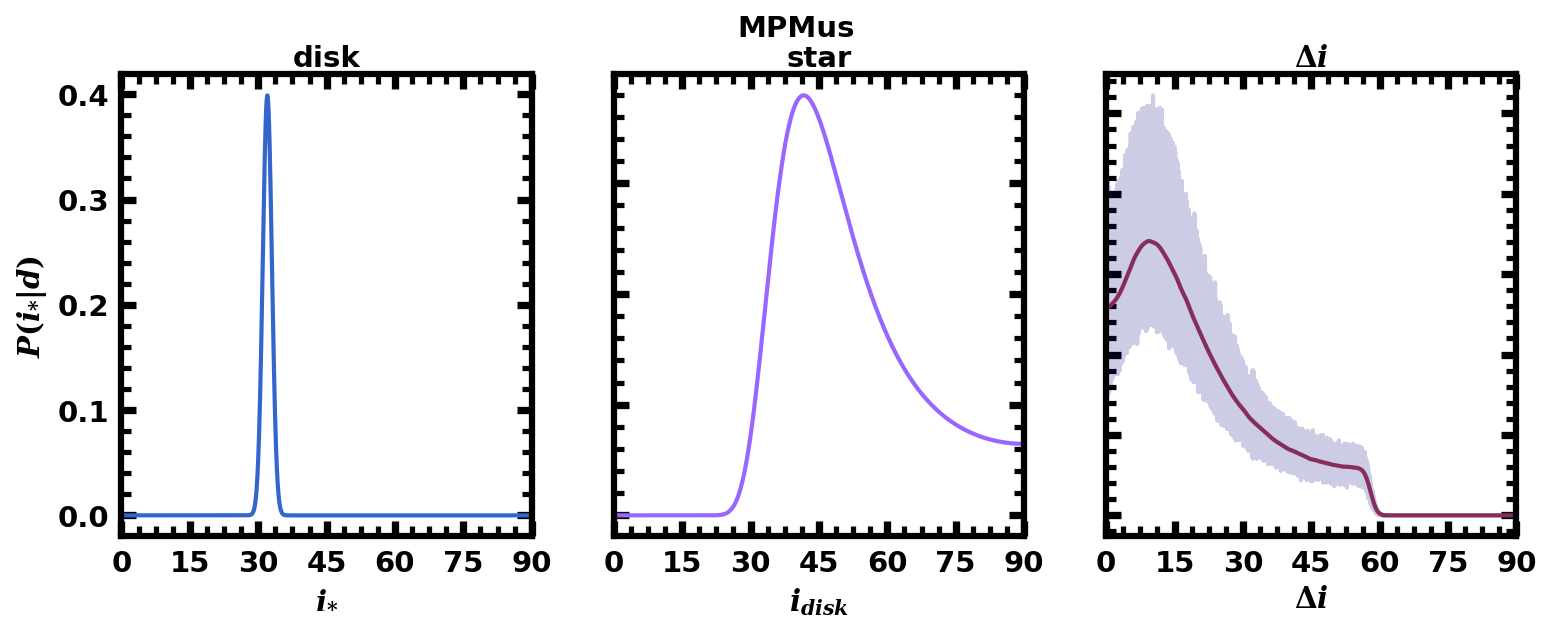

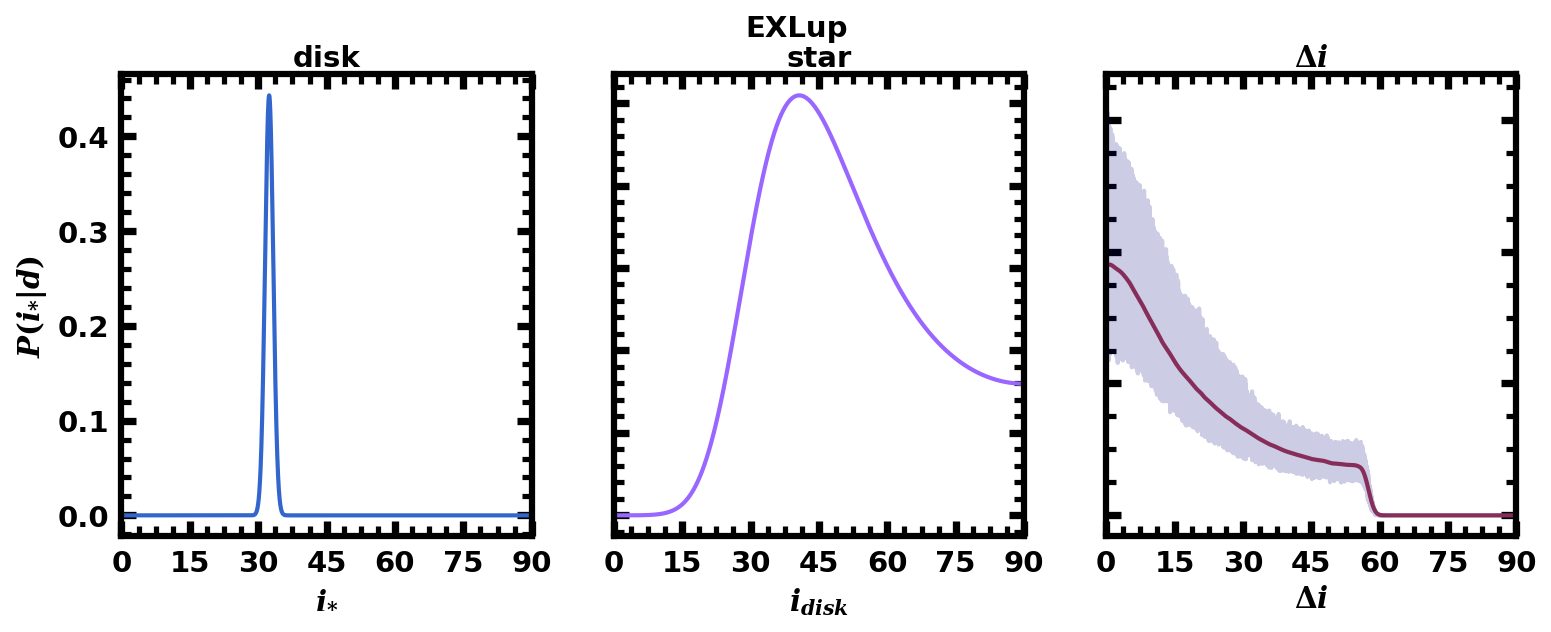

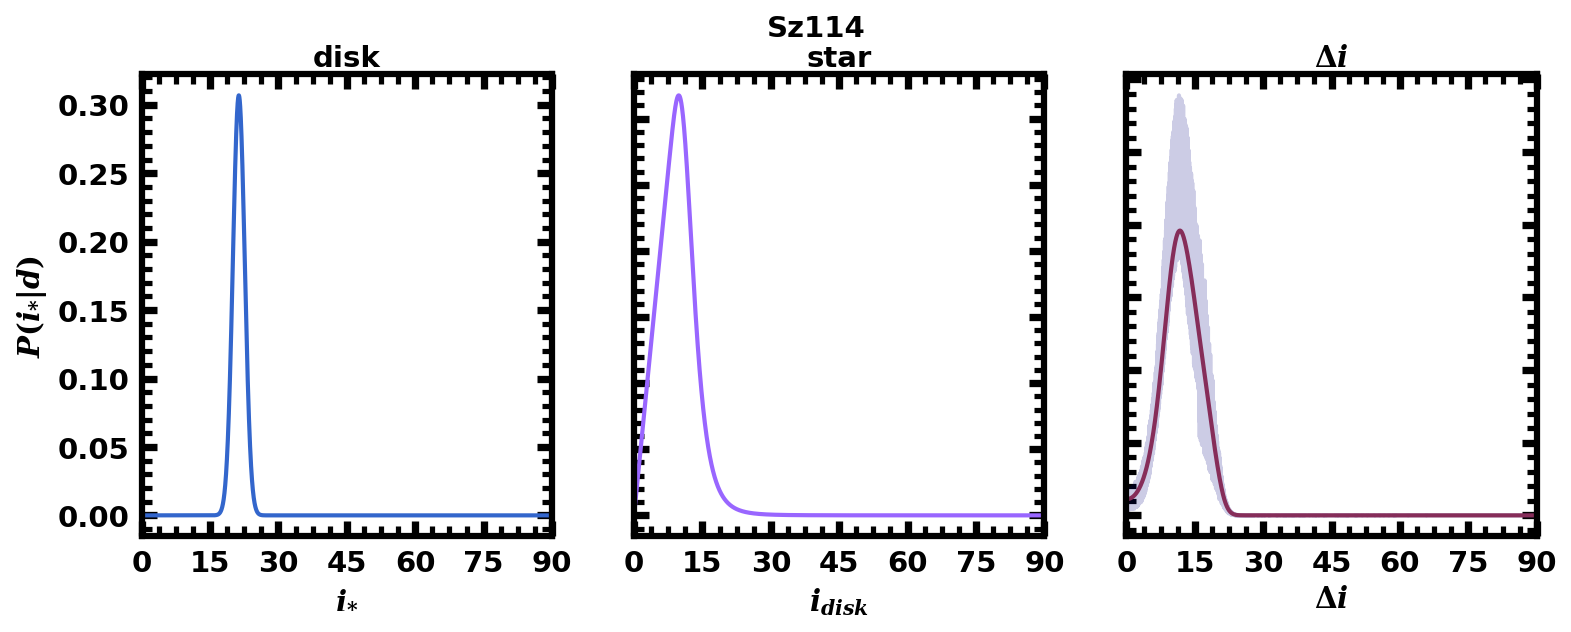

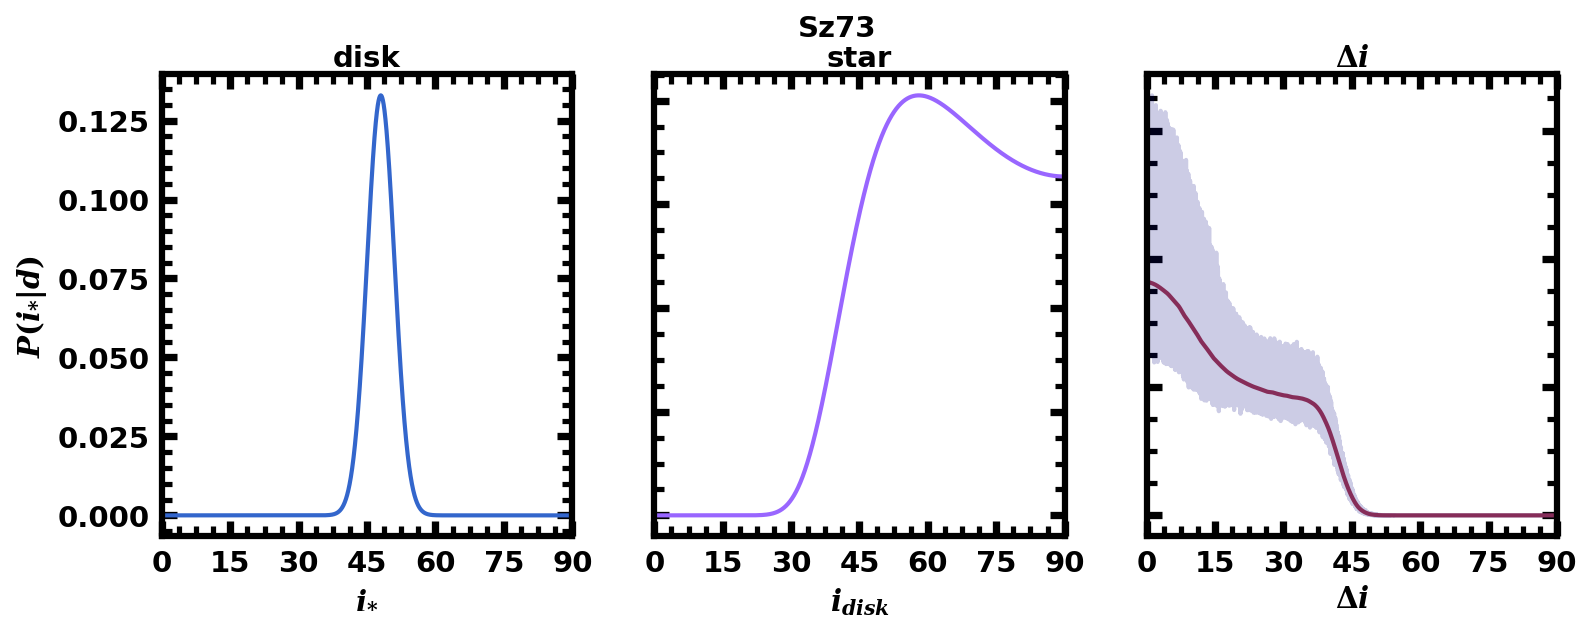

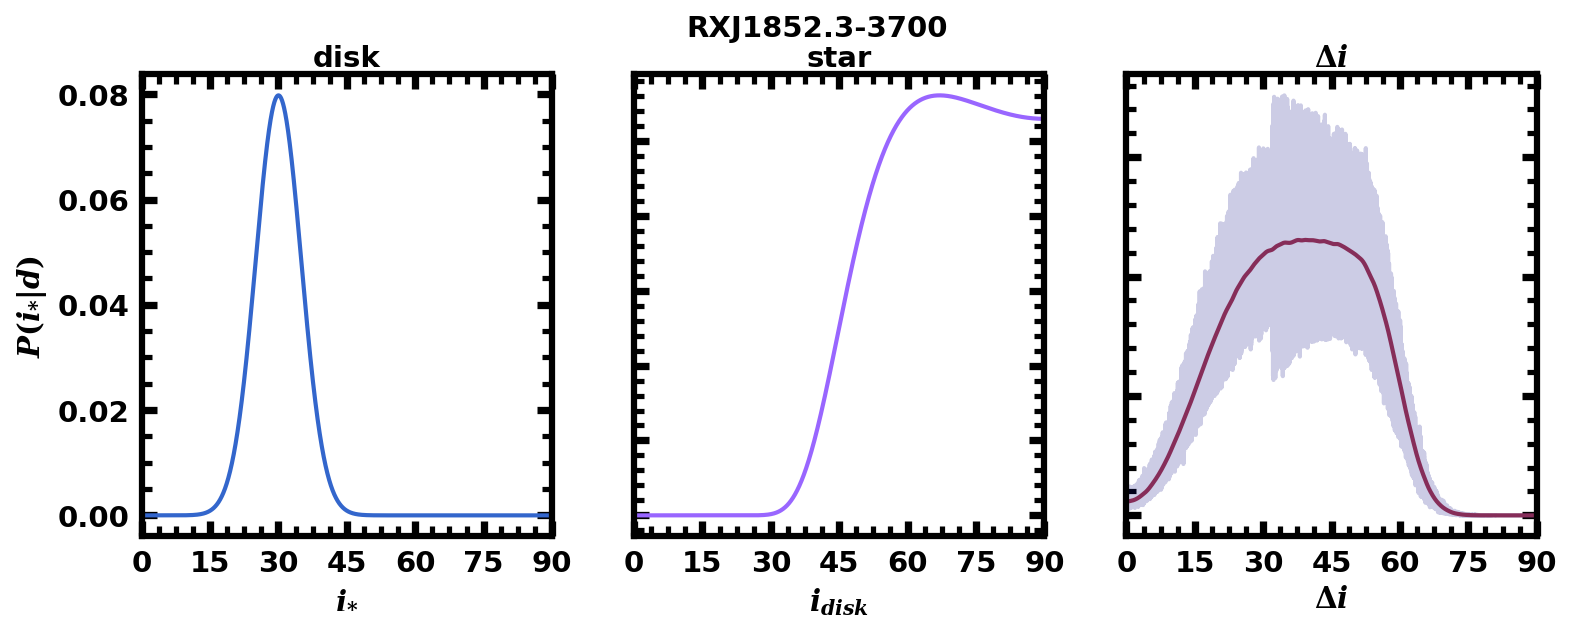

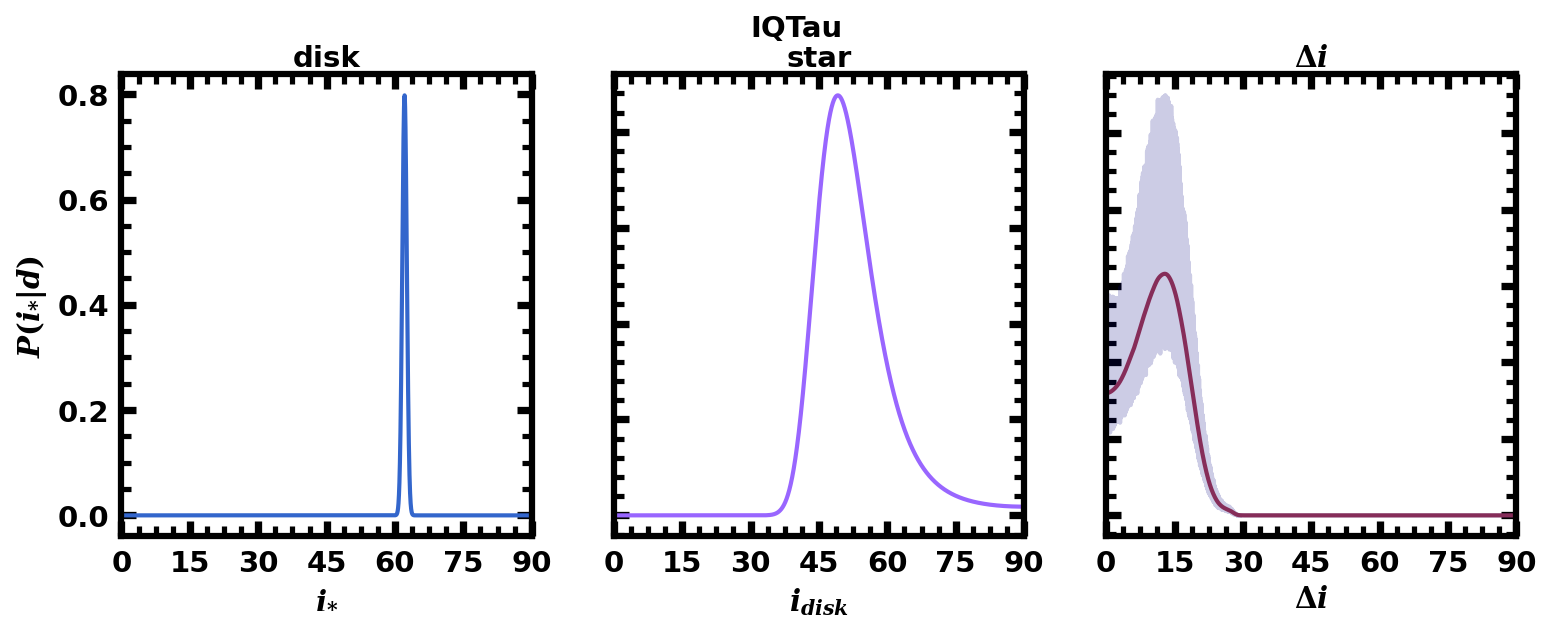

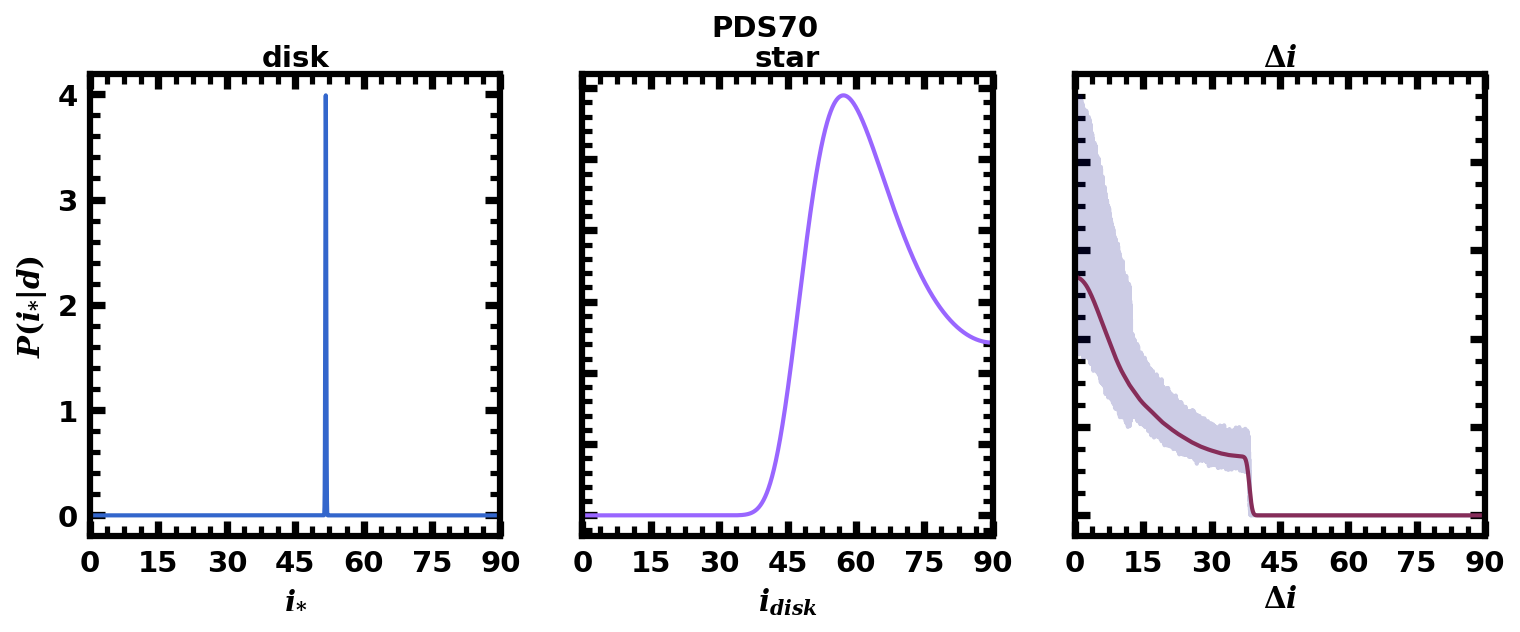

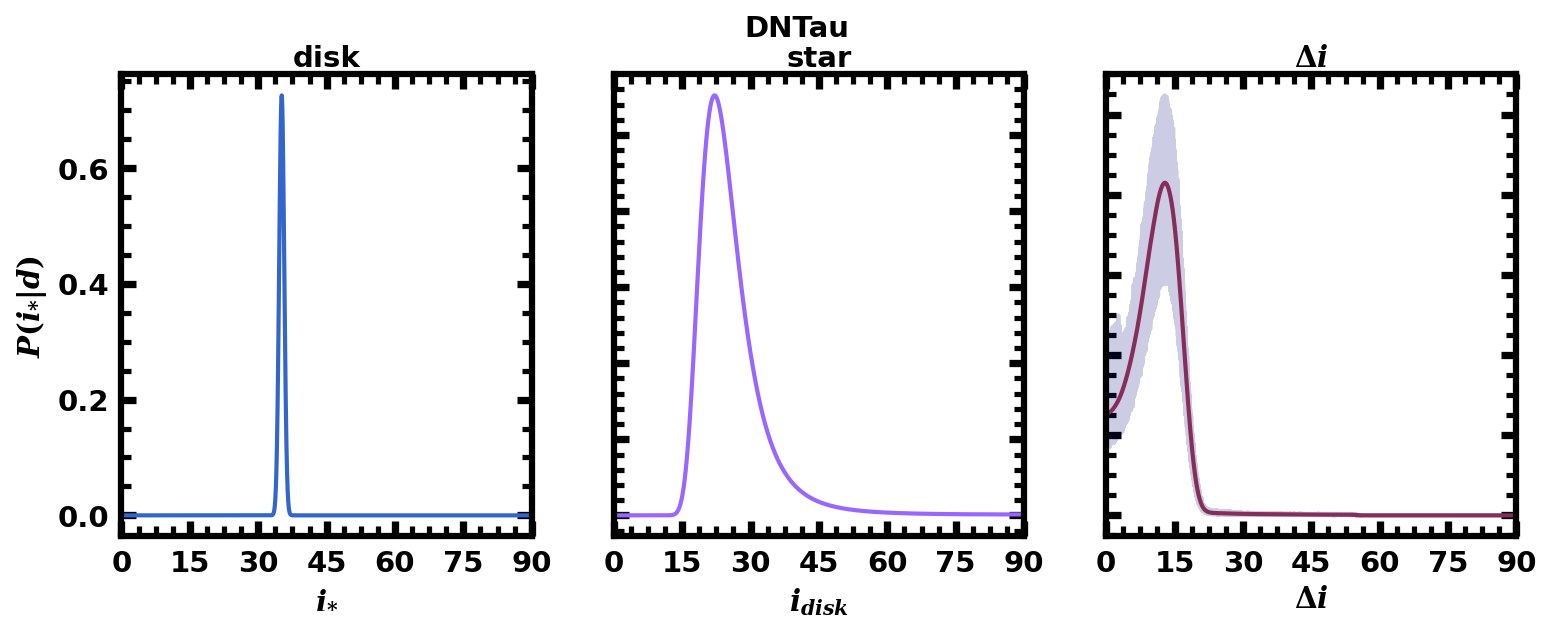

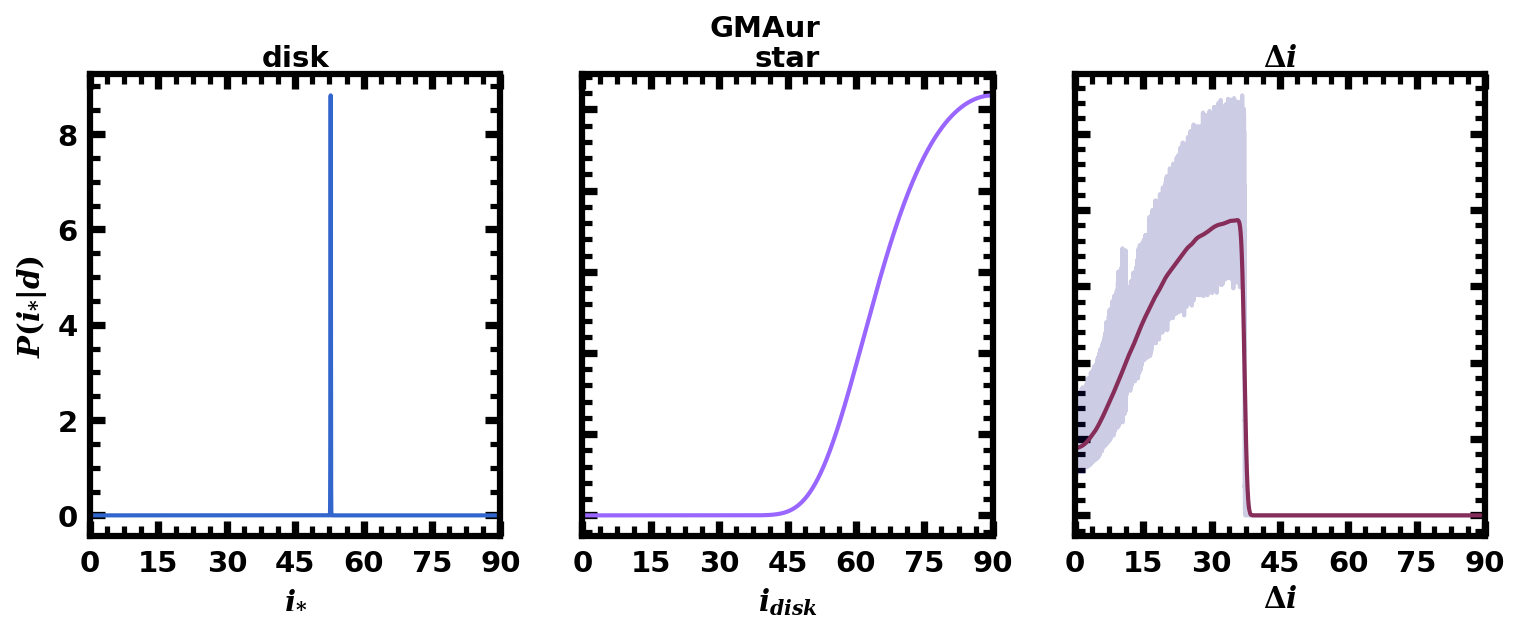

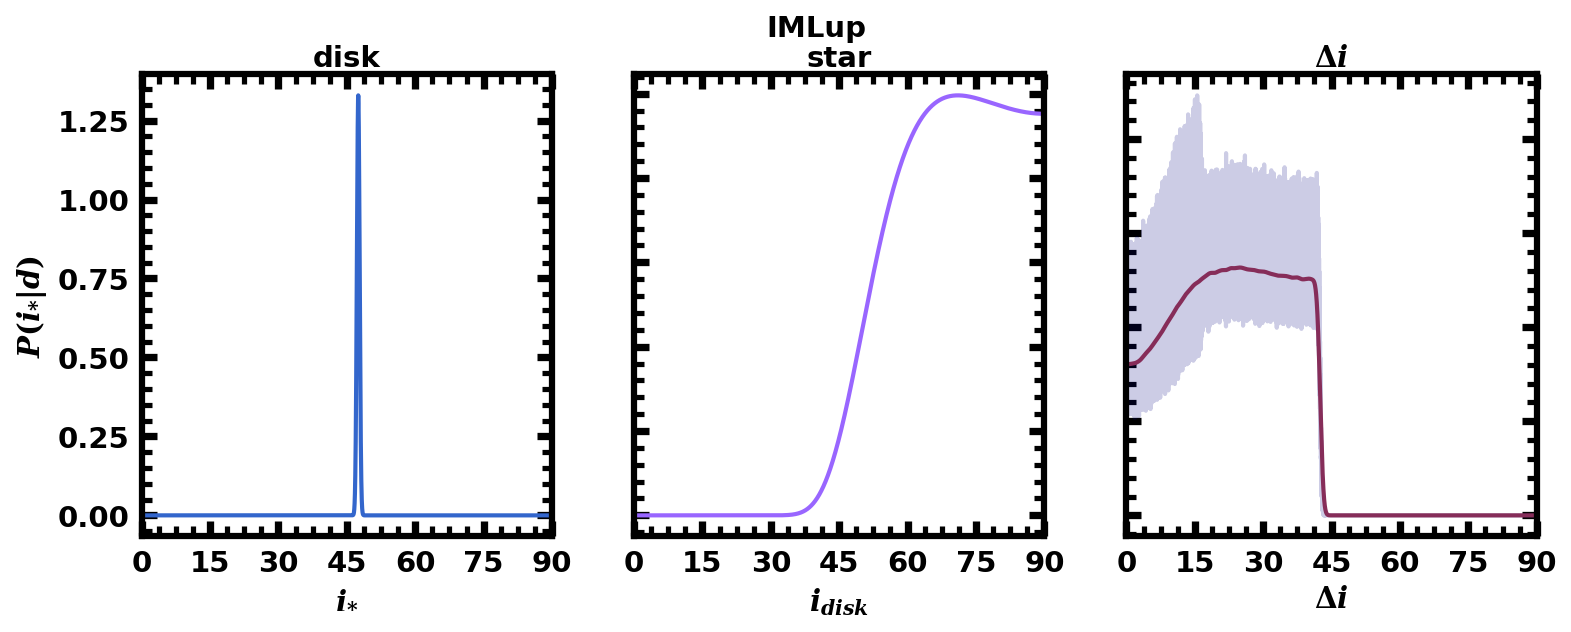

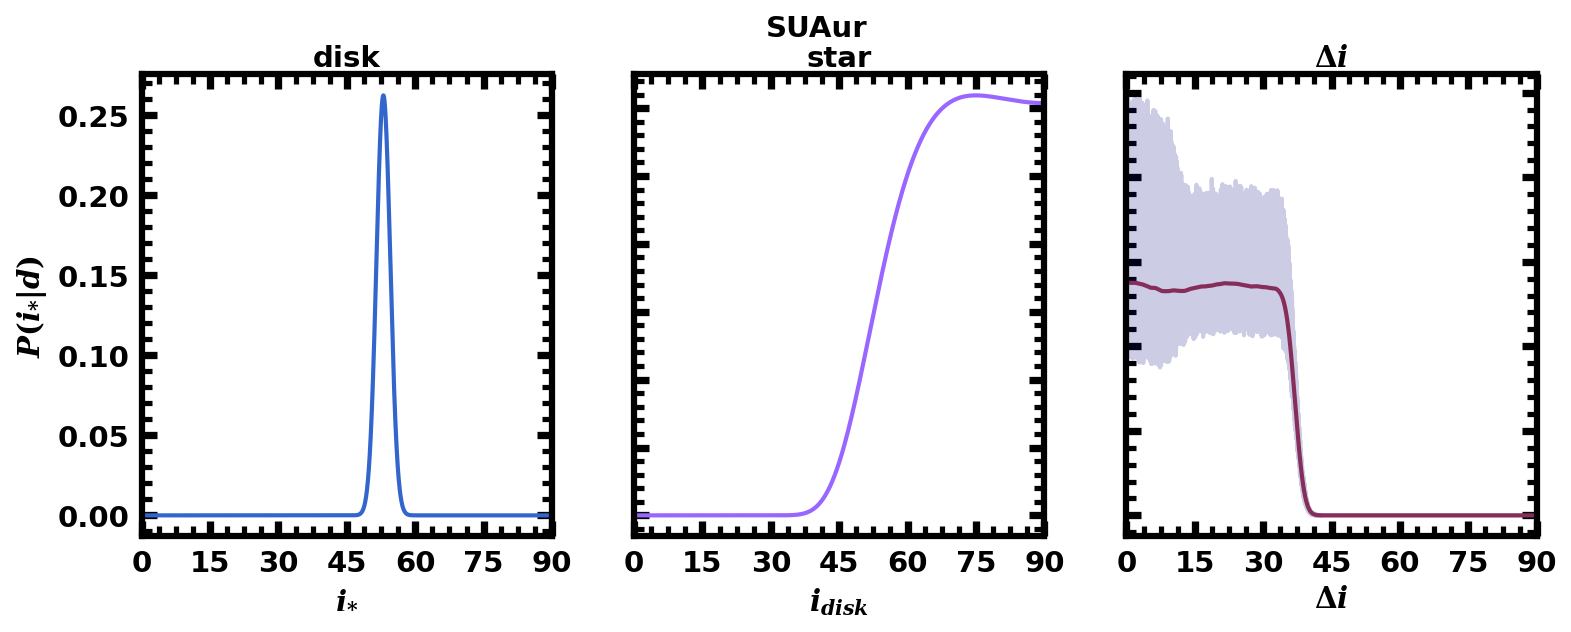

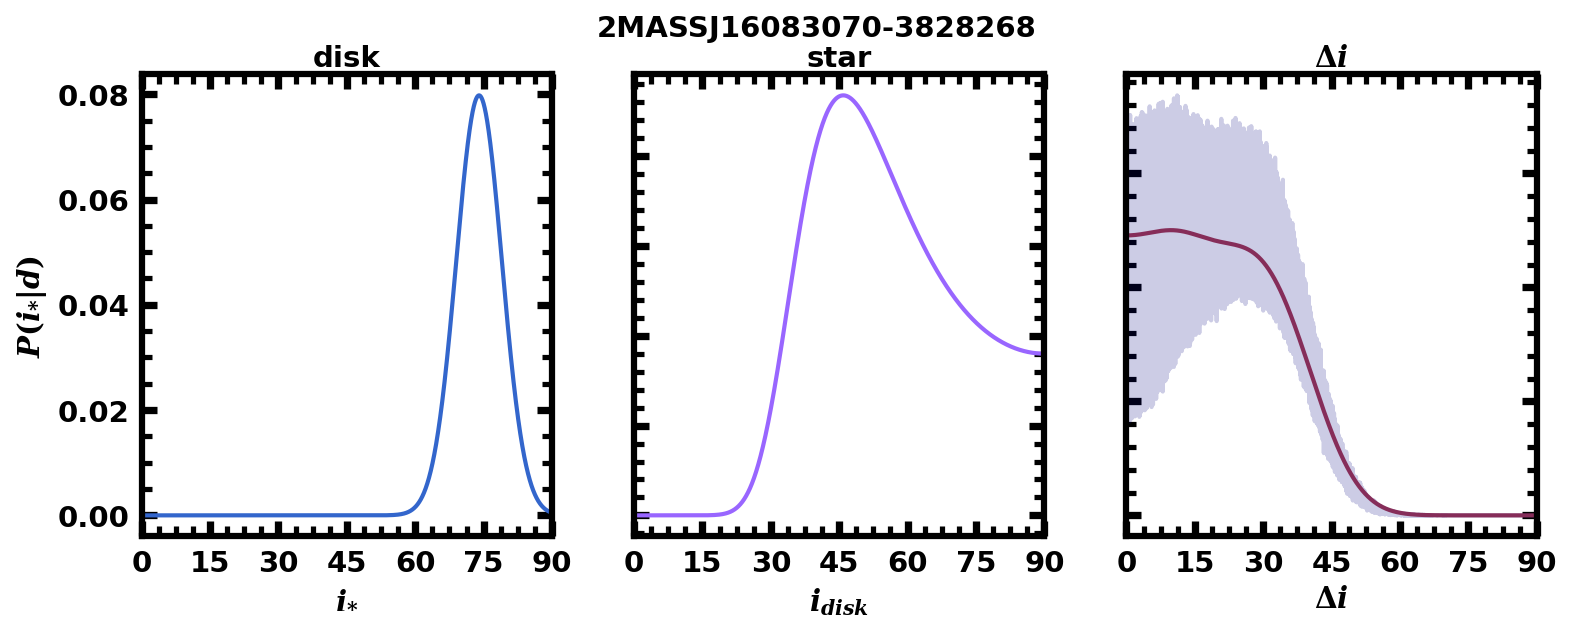

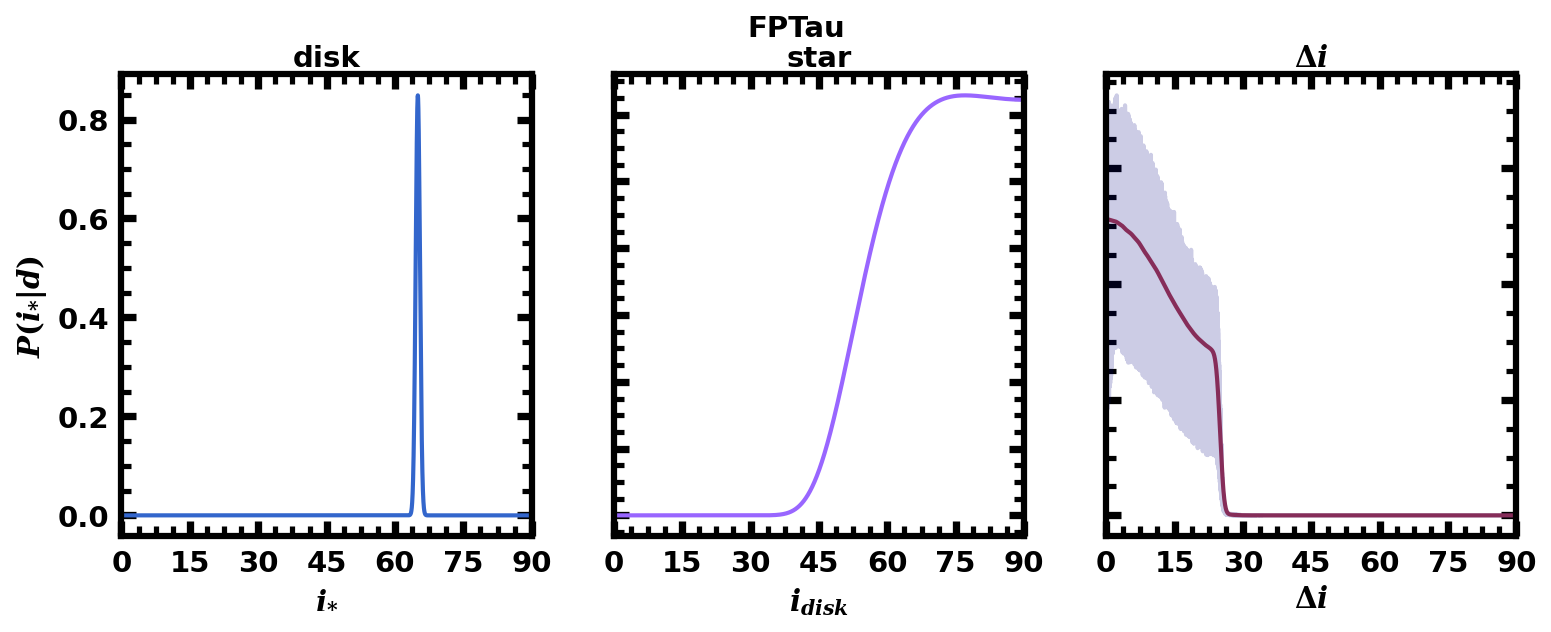

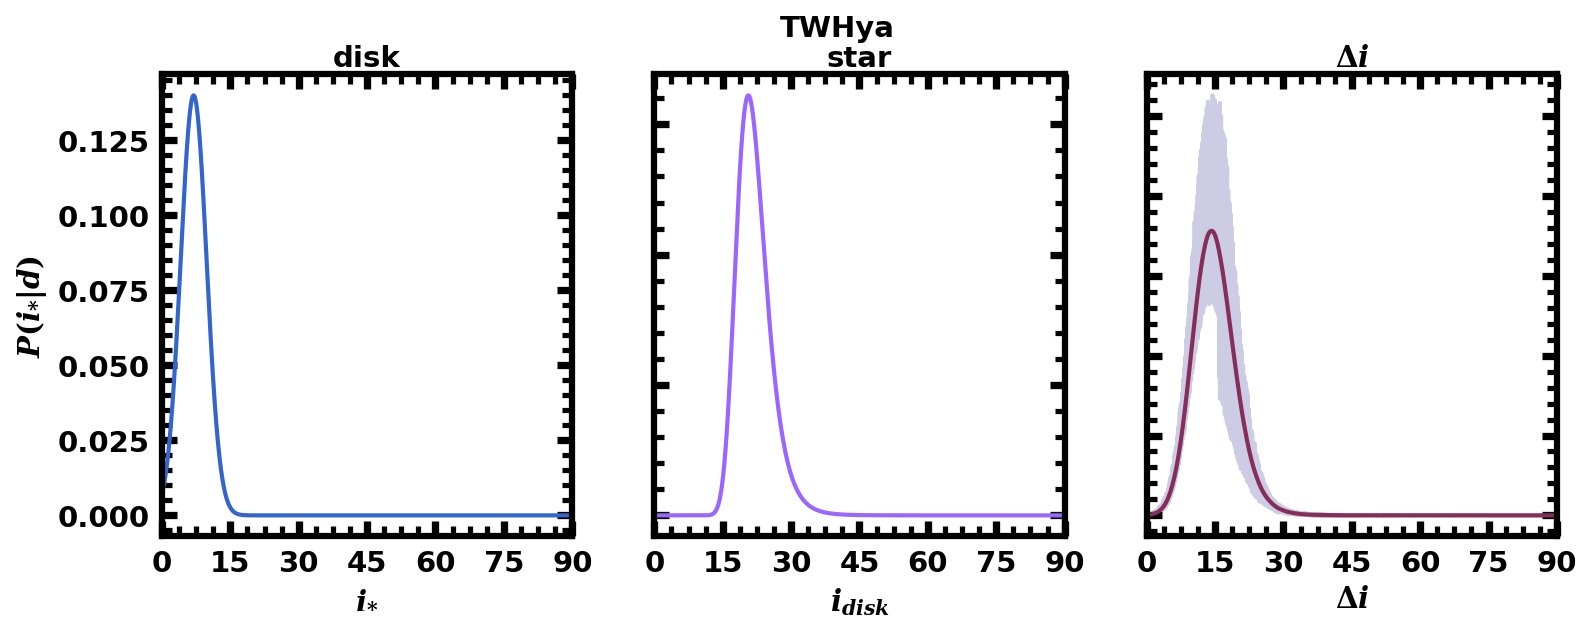

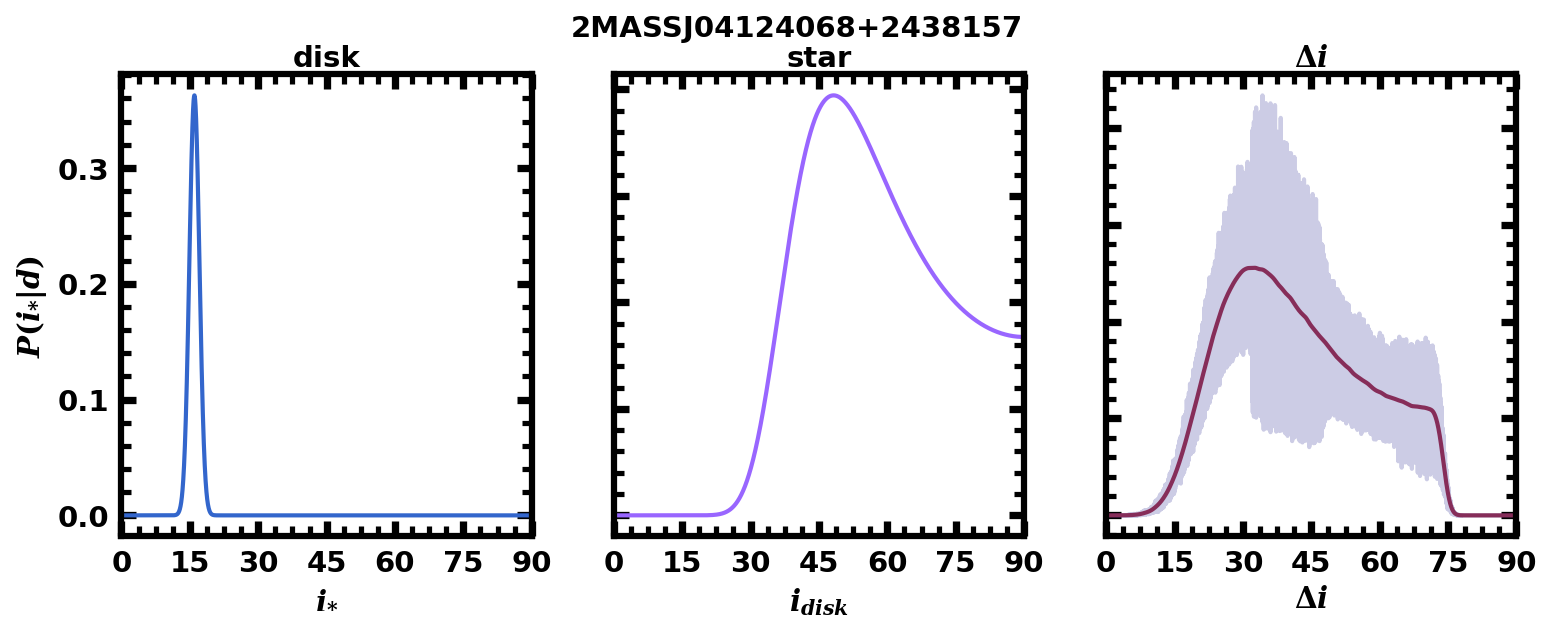

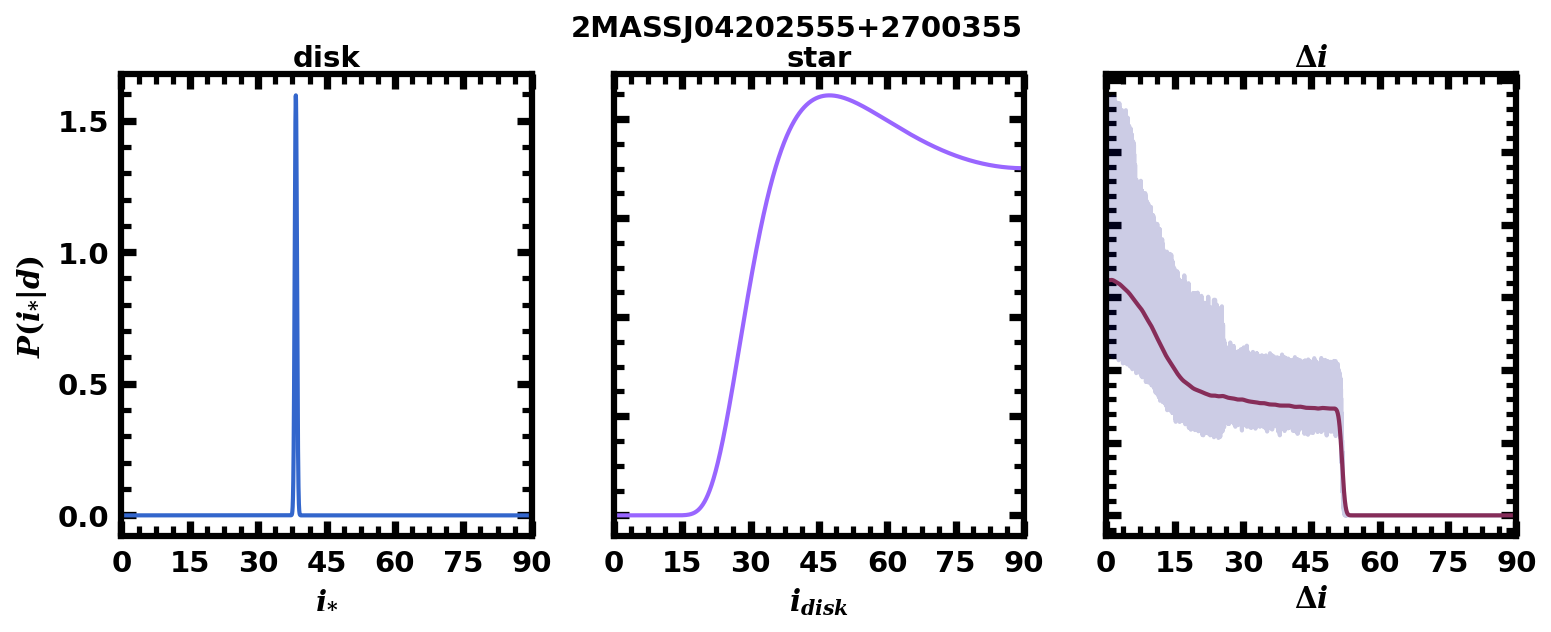

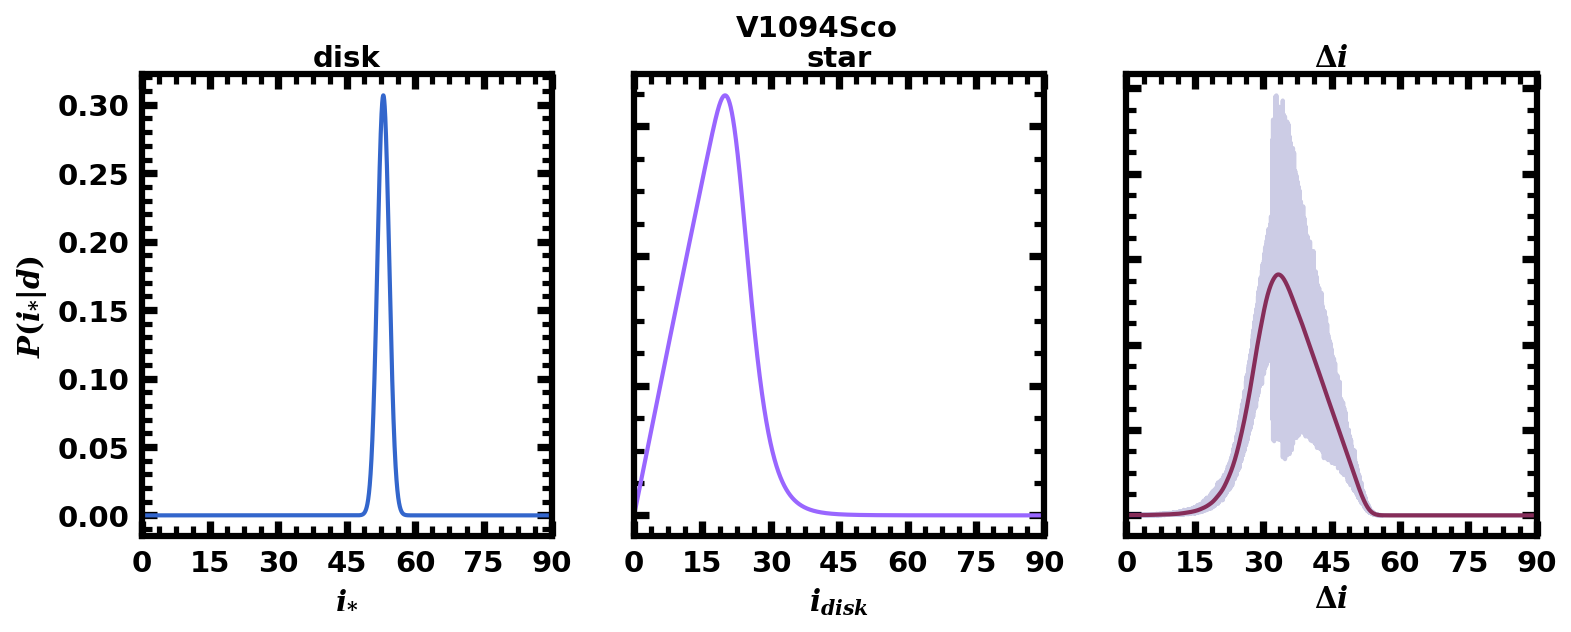

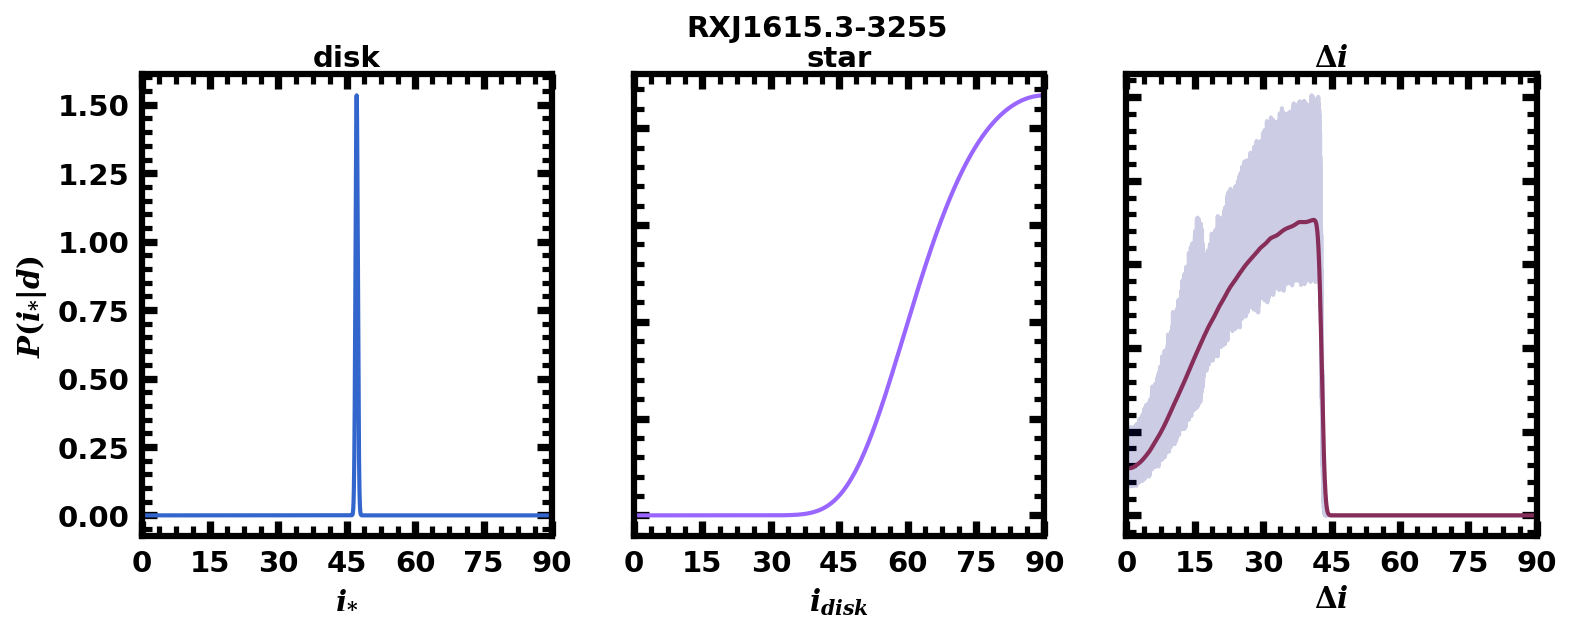

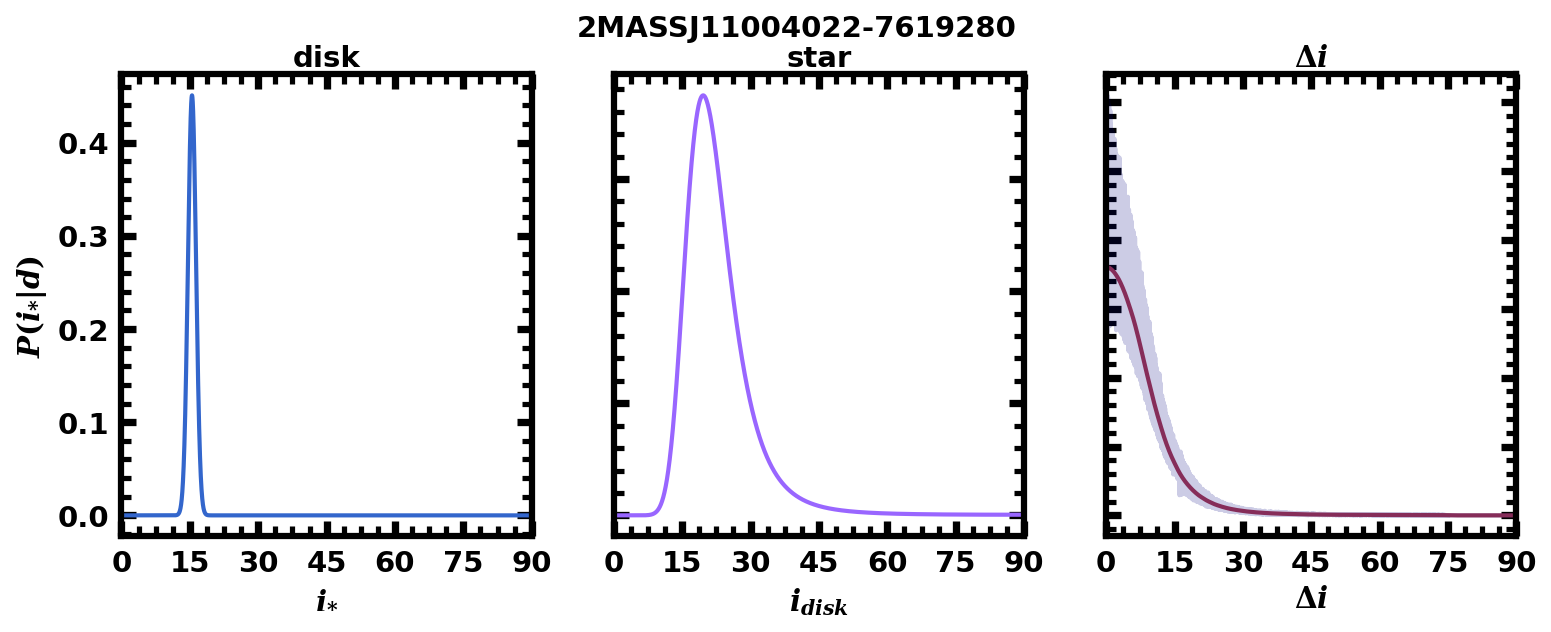

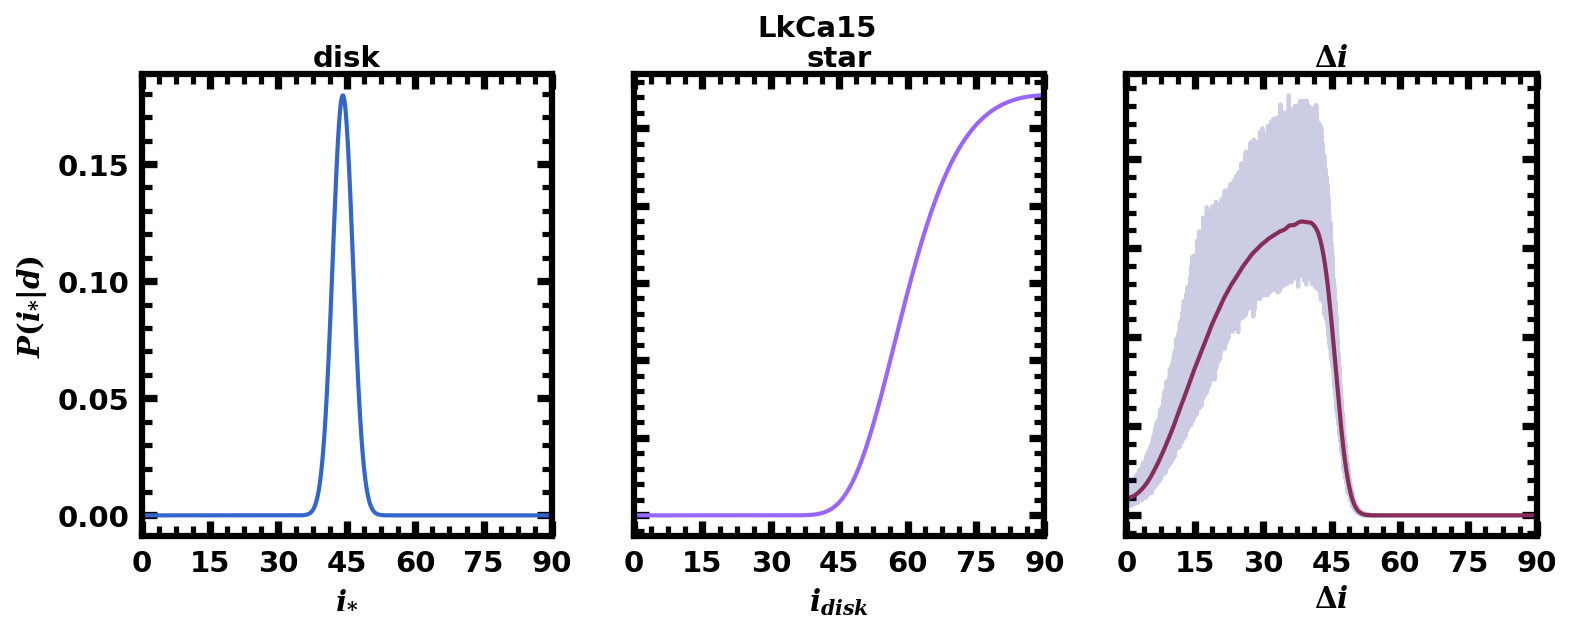

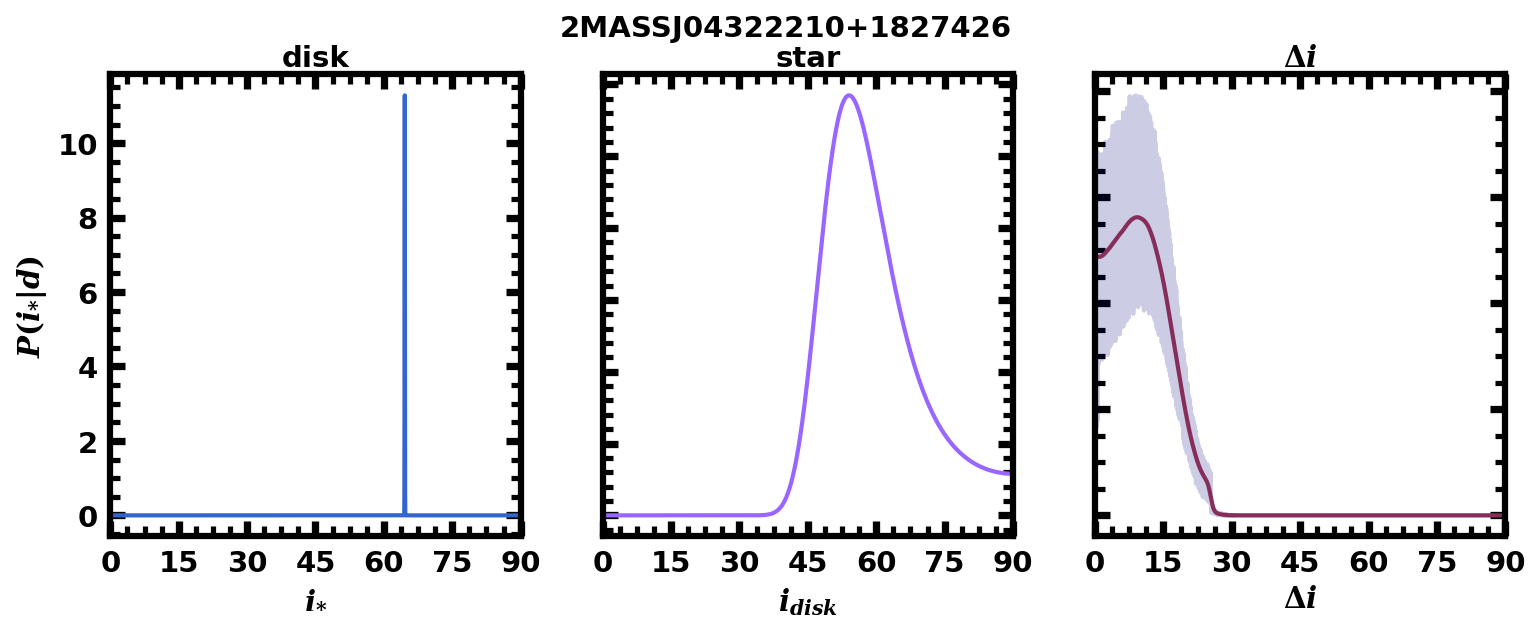

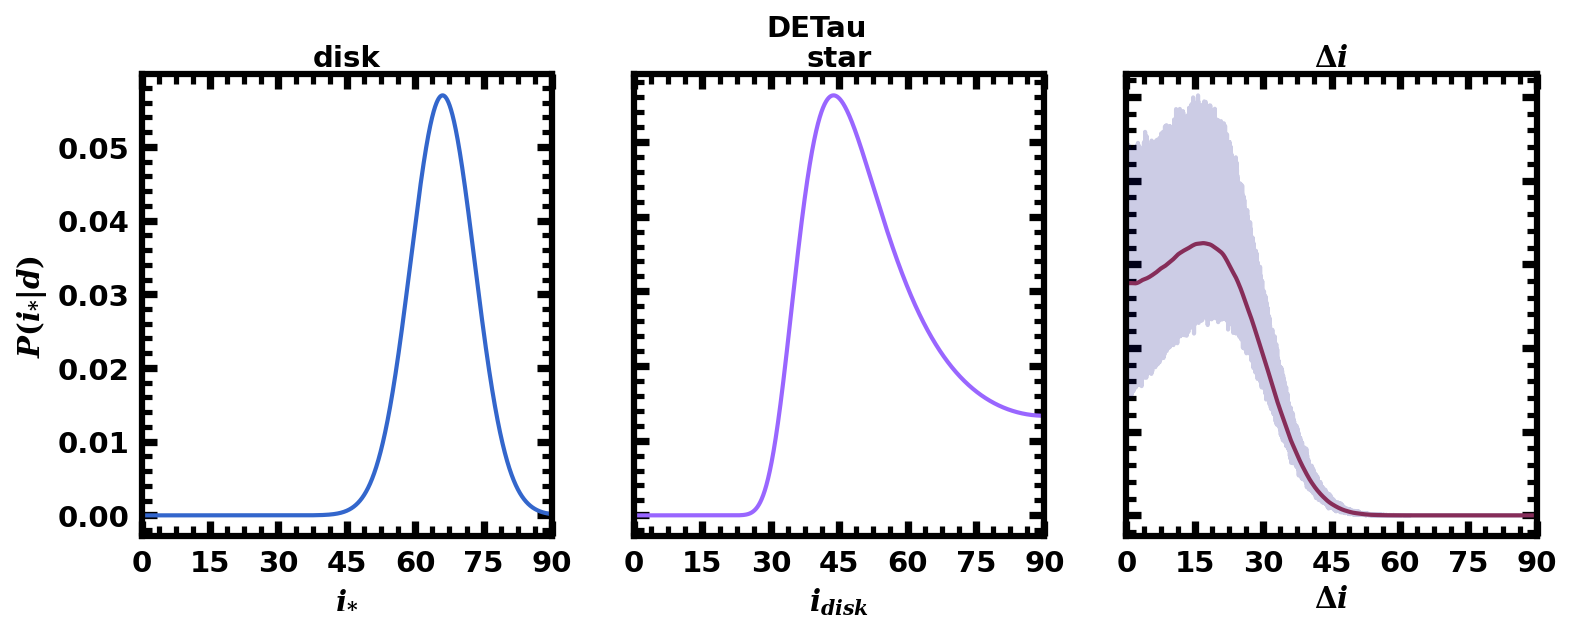

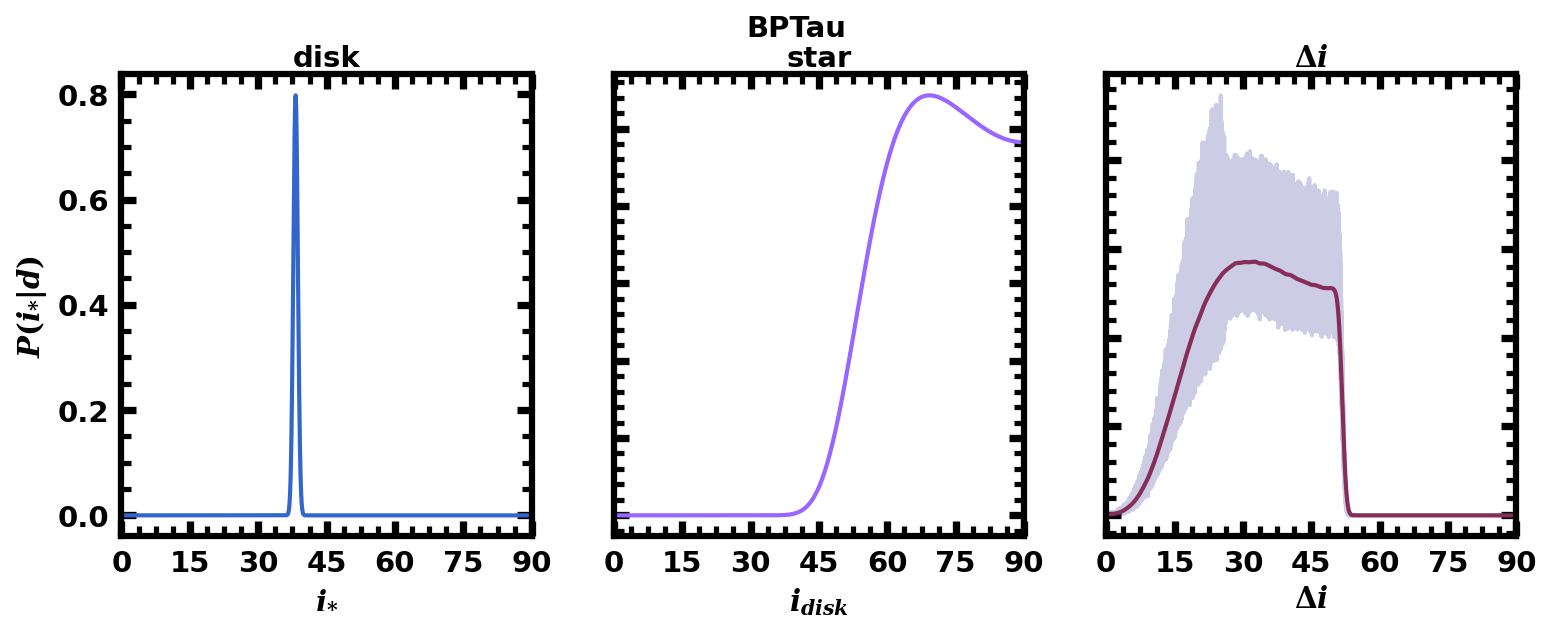

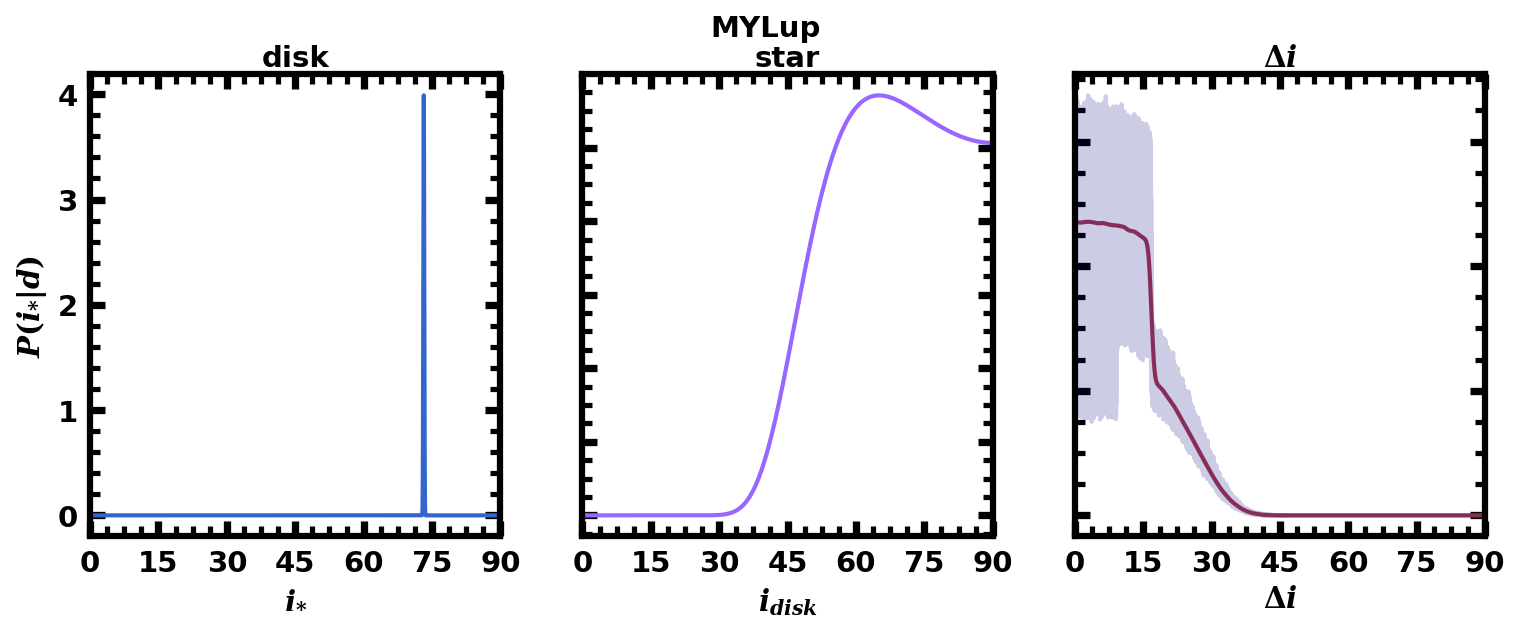

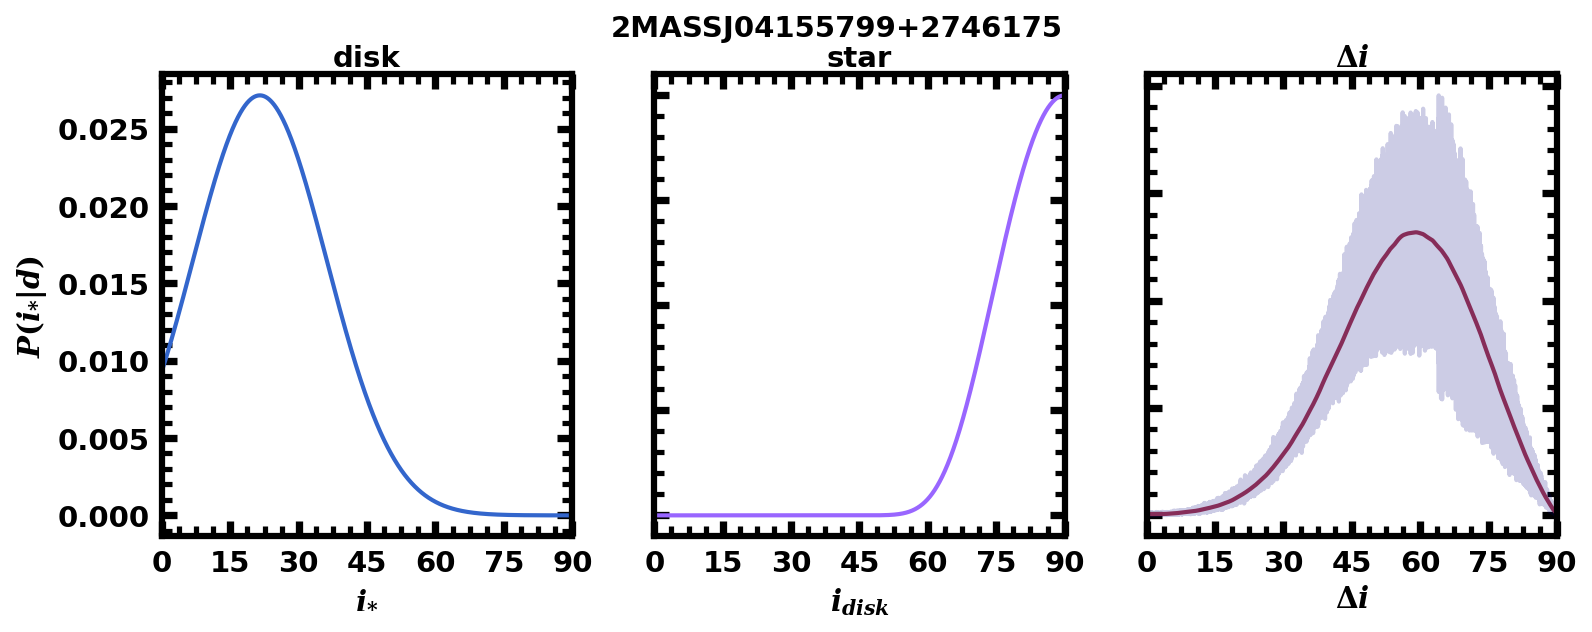

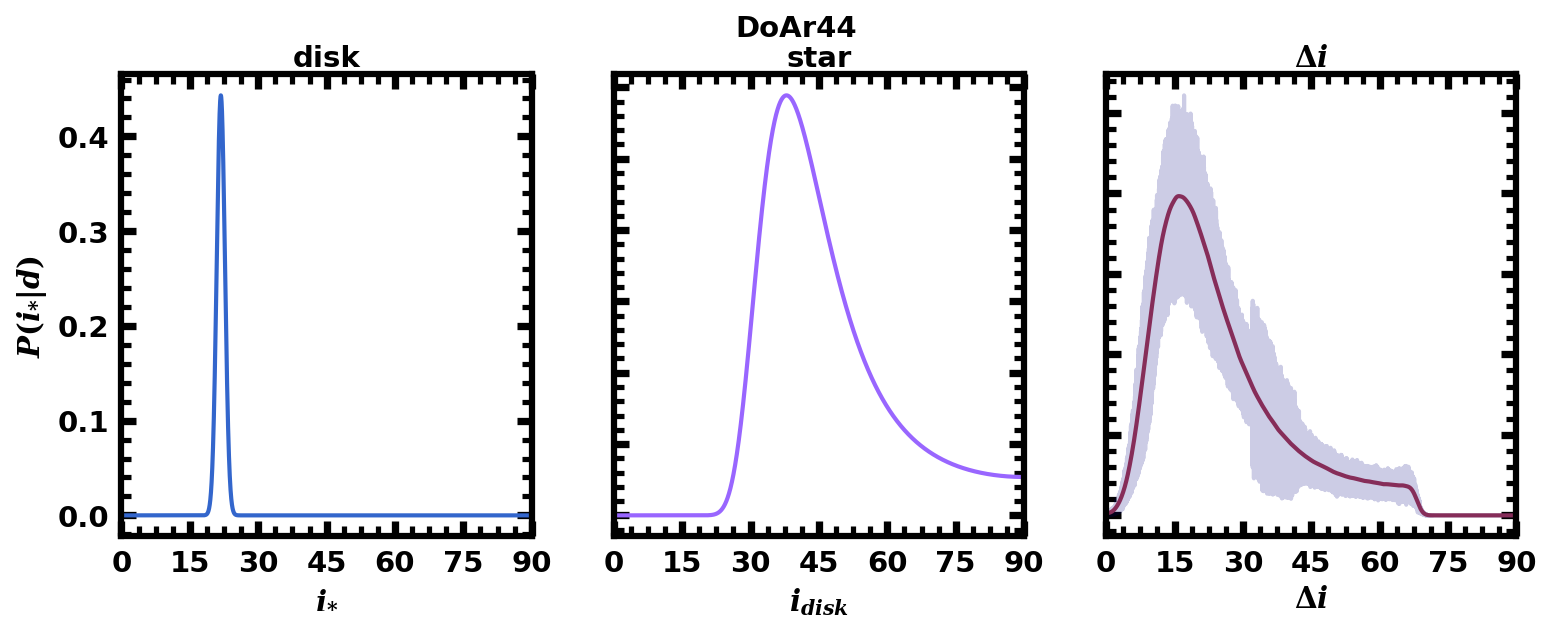

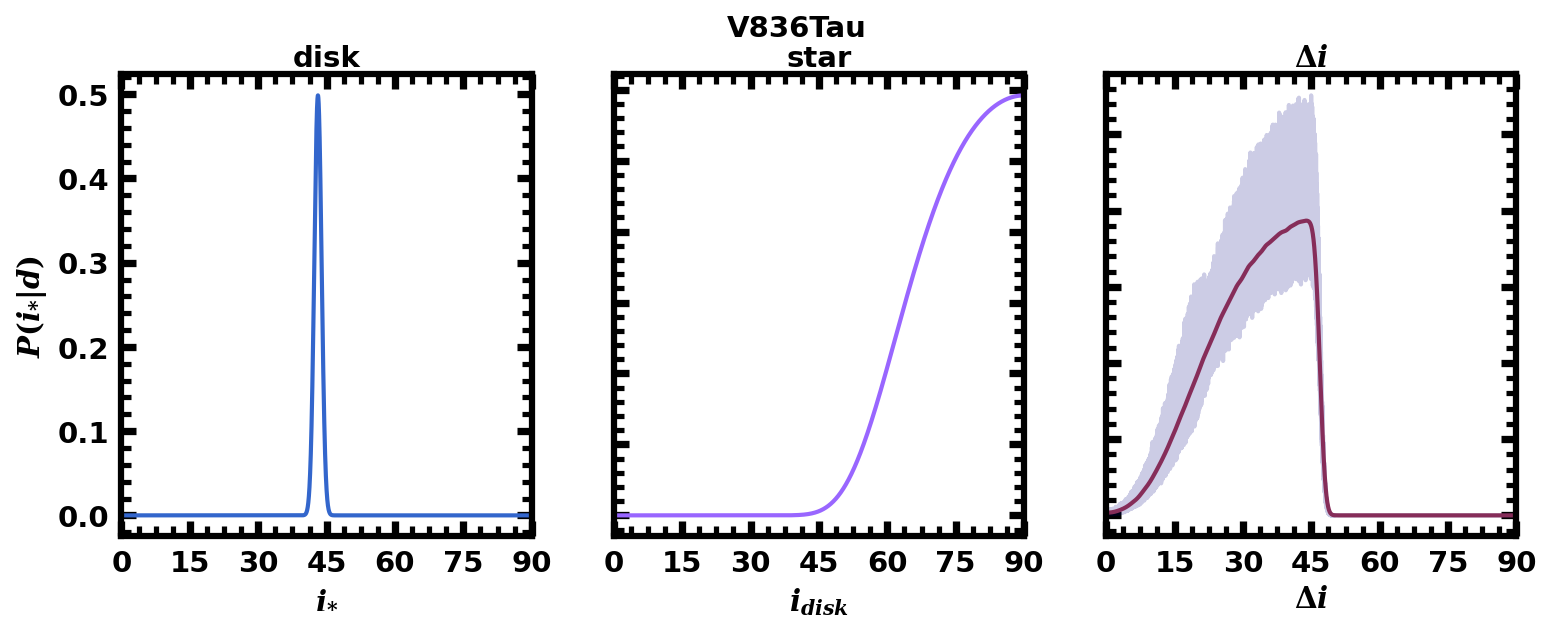

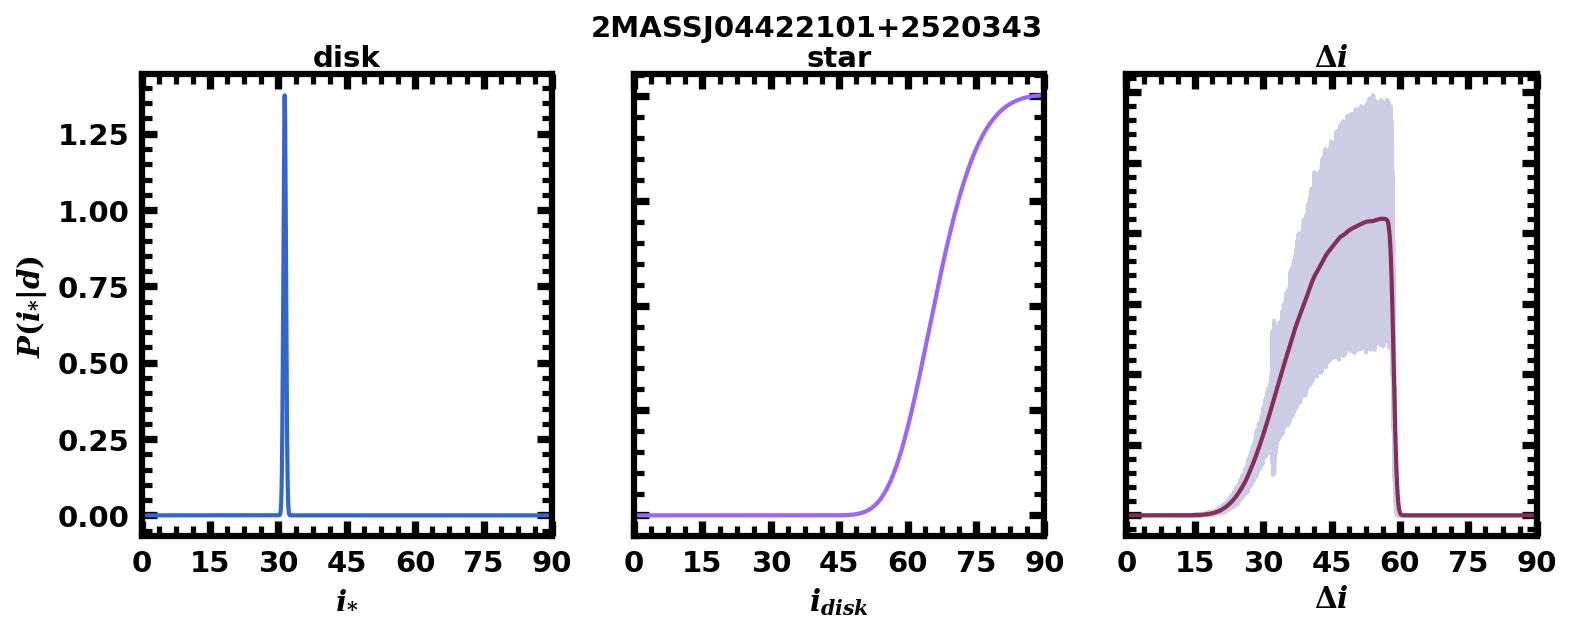

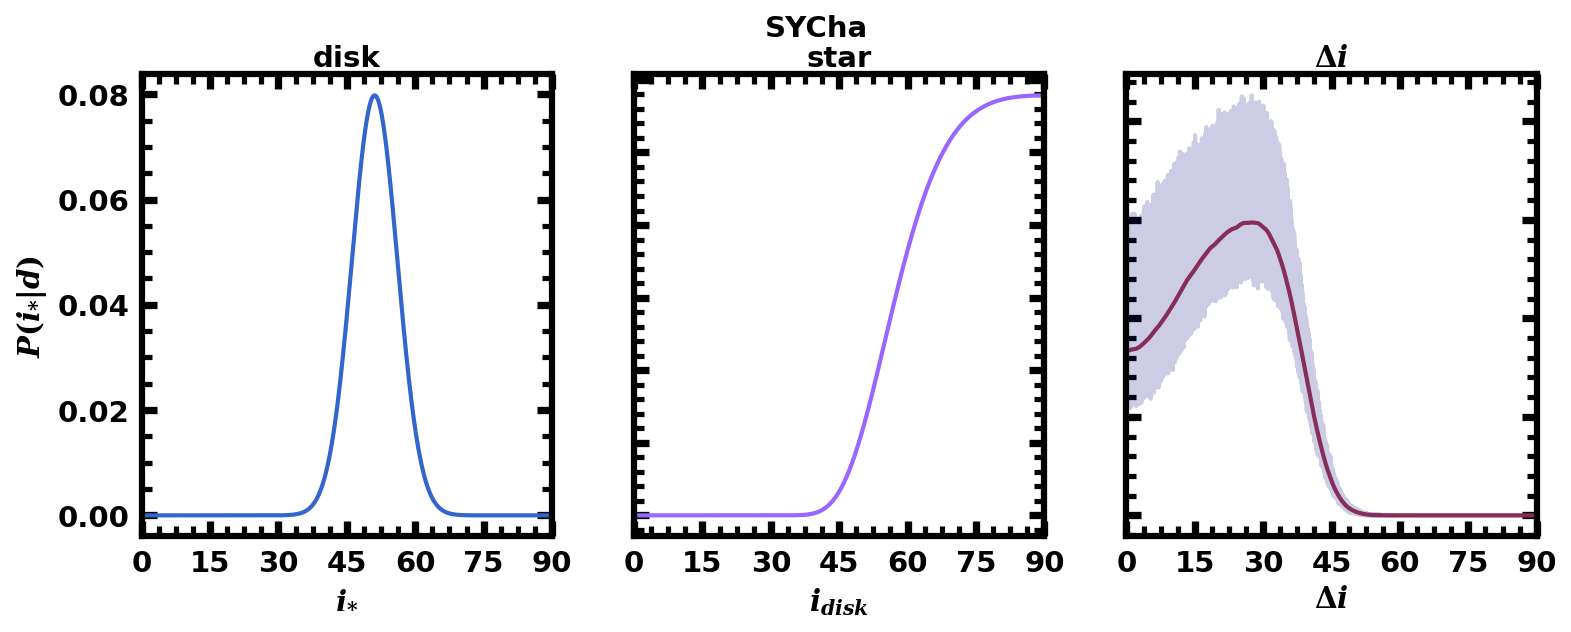

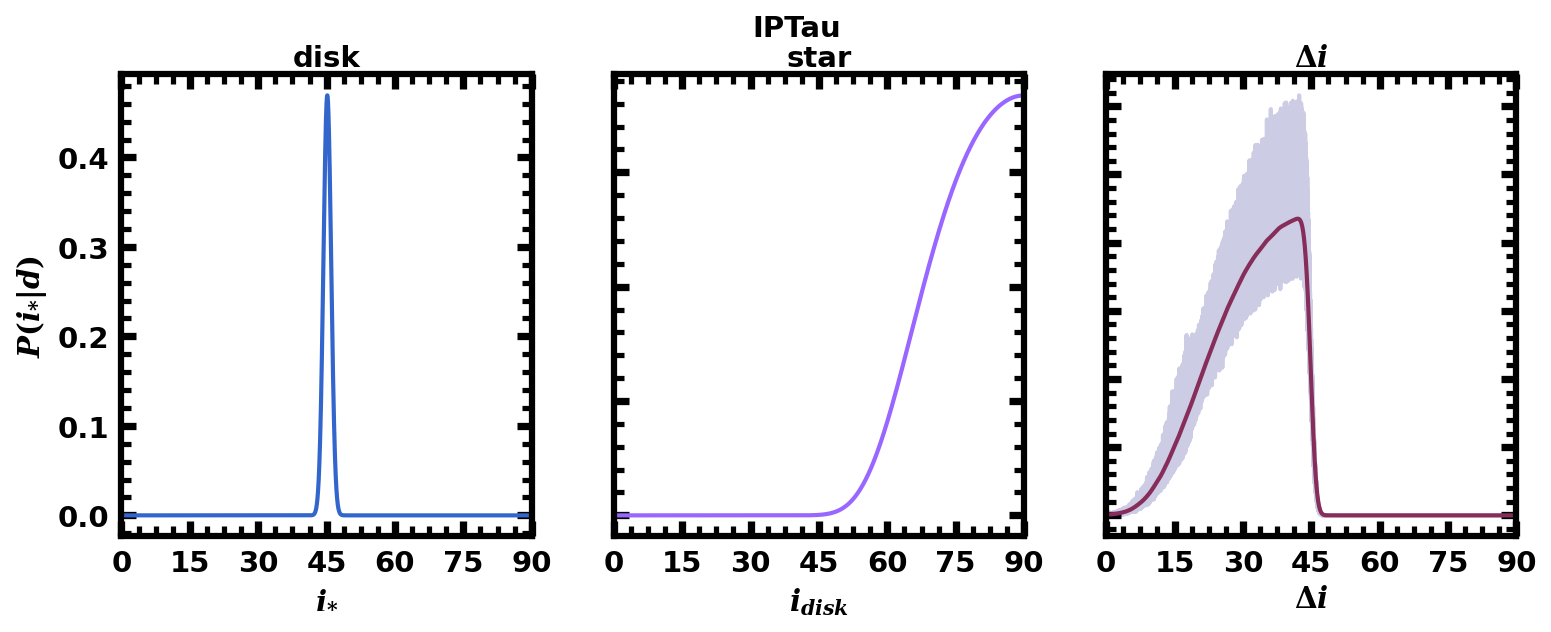

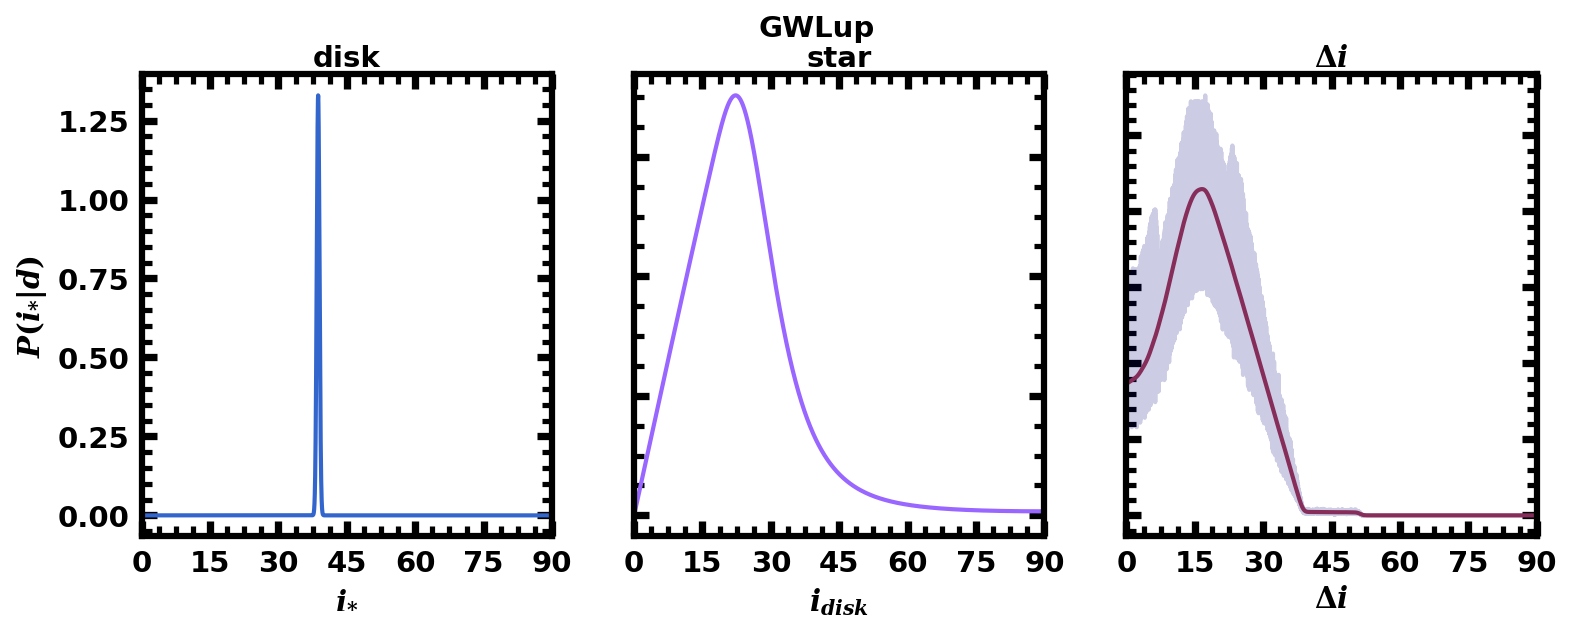

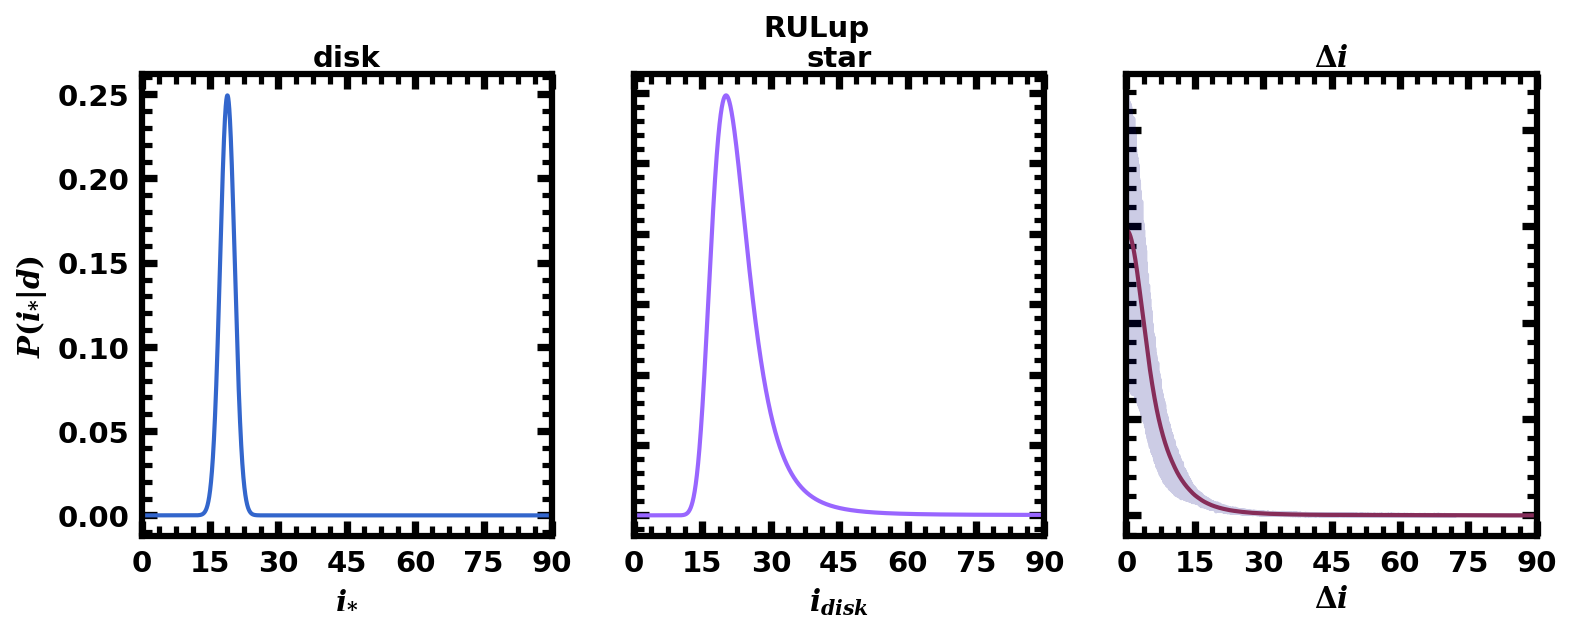

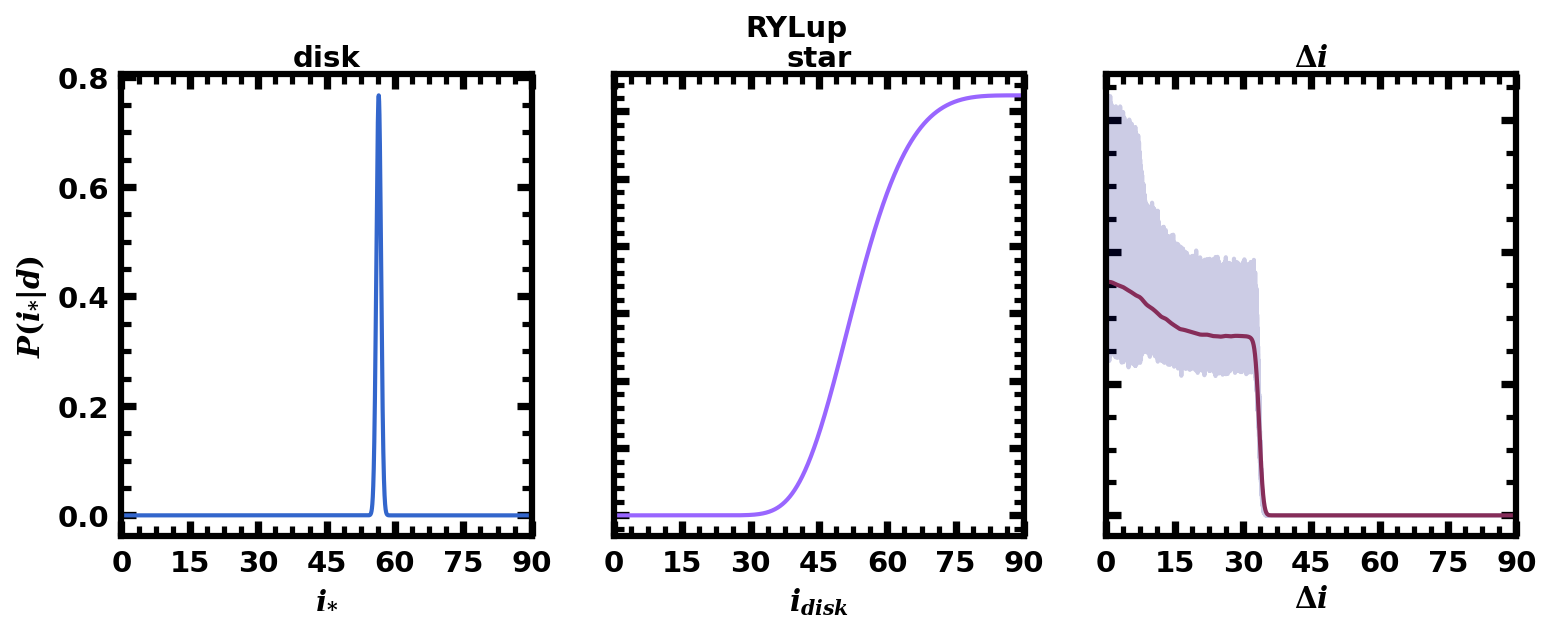

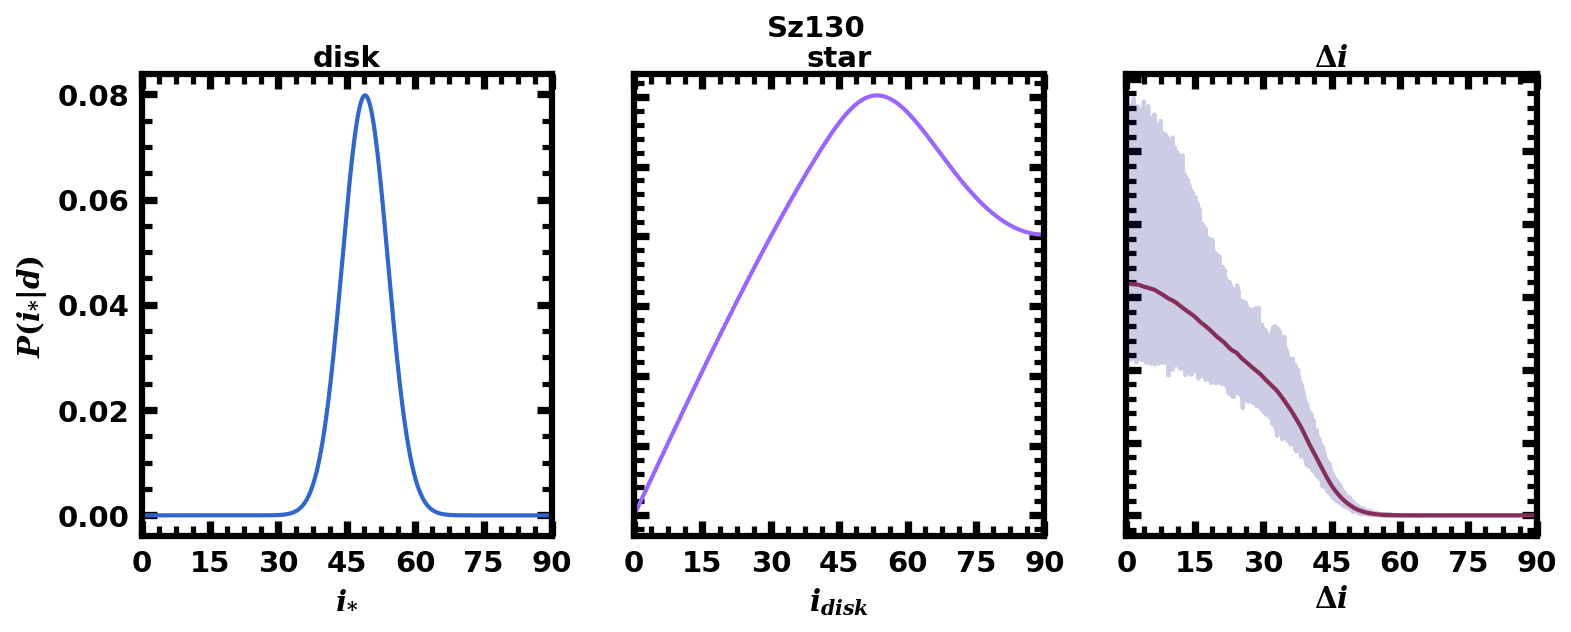

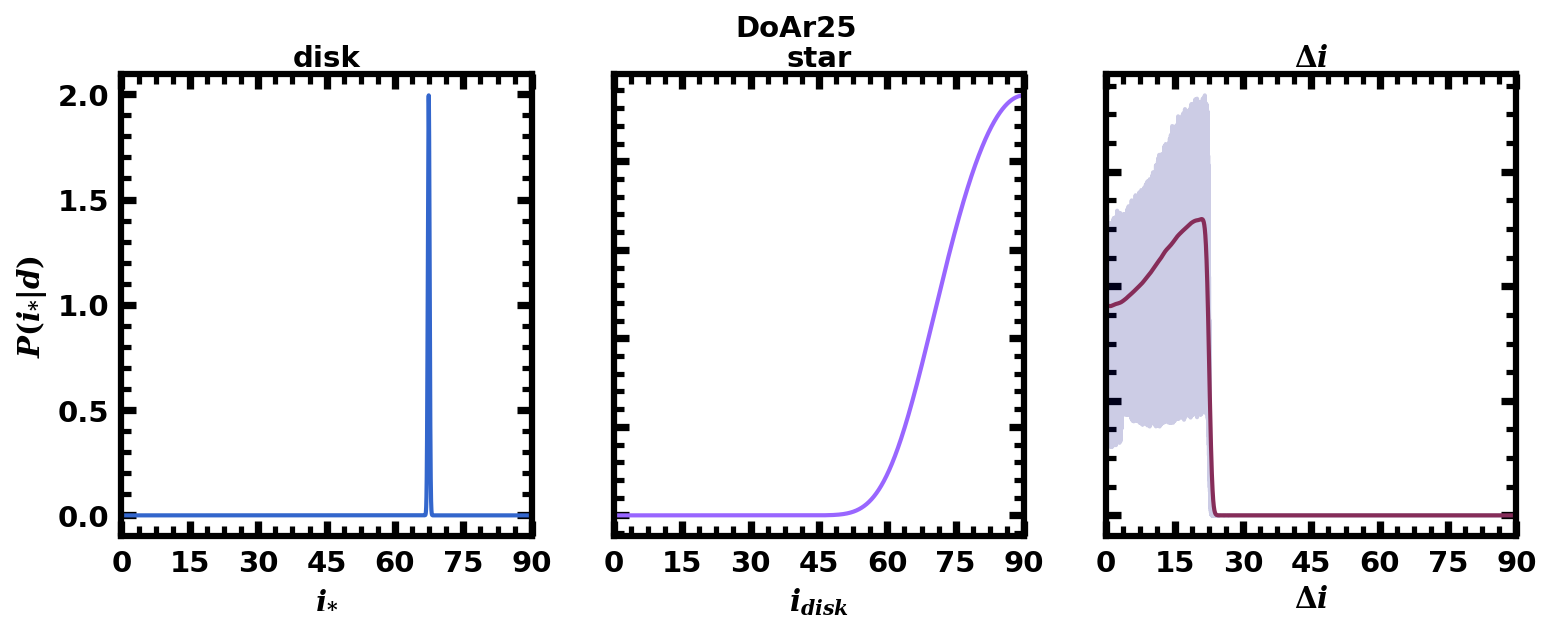

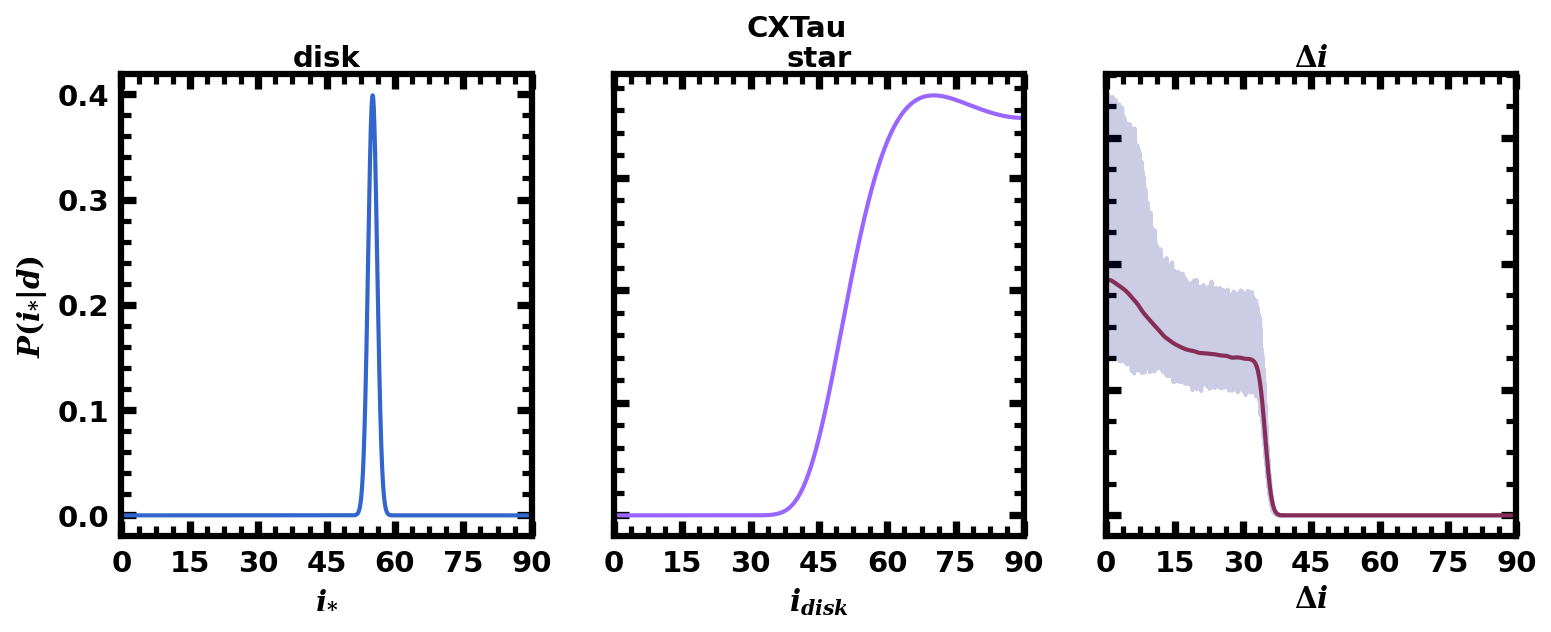

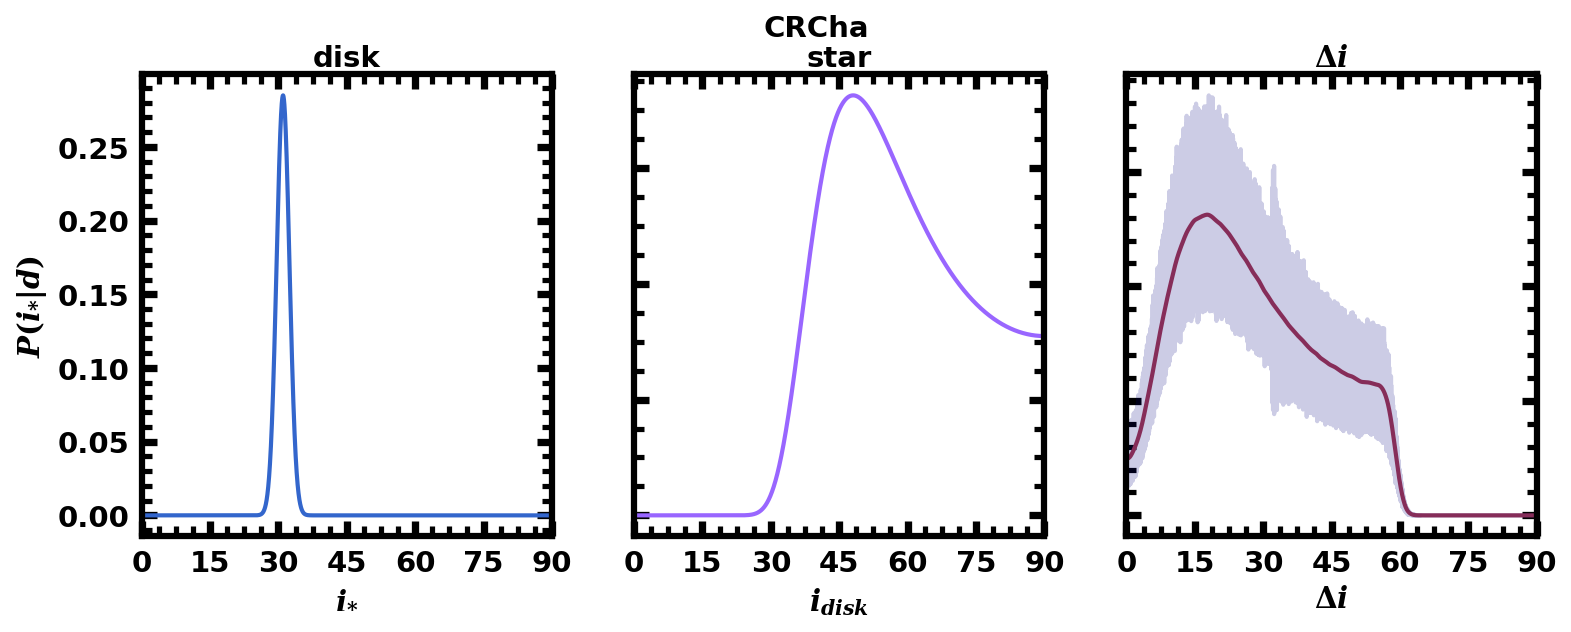

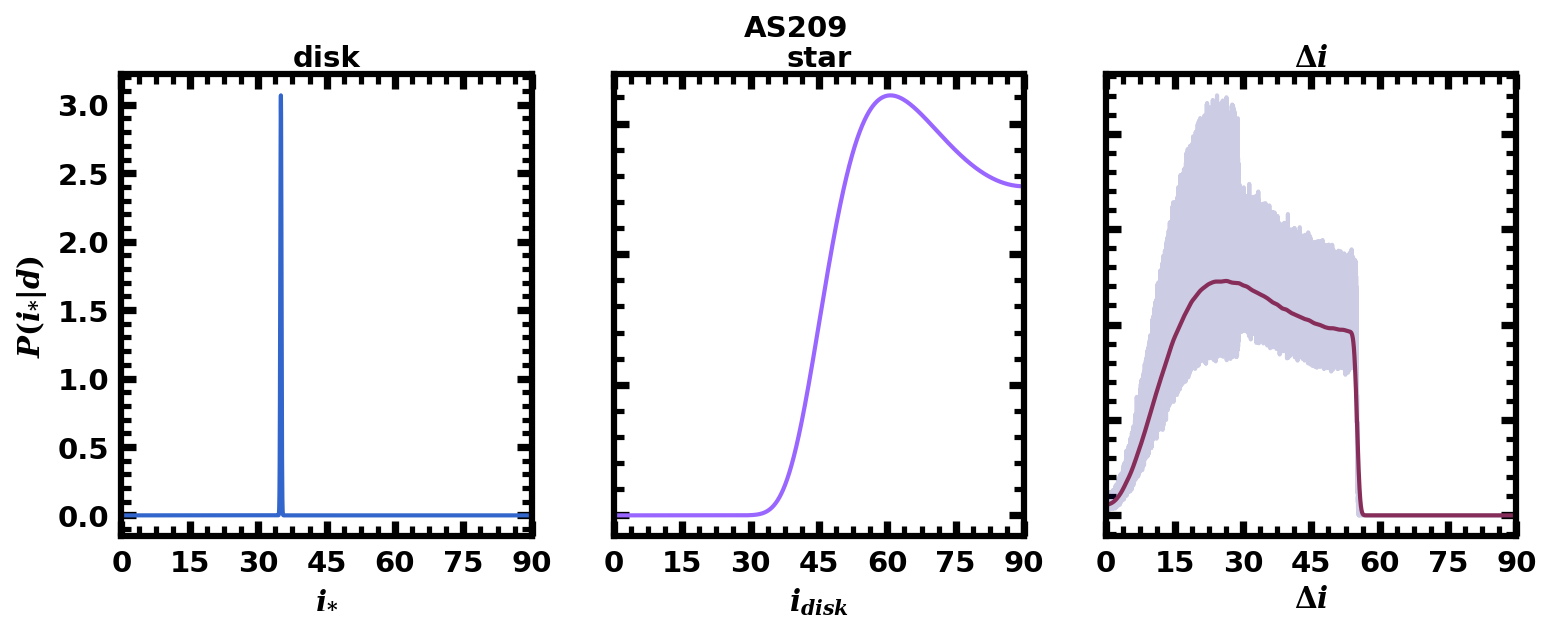

In [131]:
panel_w = 4
panel_h = 3.5

fig_w = panel_w + 0.16 * panel_w
fig_h = panel_h * len(files) + (0.10 * panel_h) * len(files)

# quickfig = plt.figure(figsize=(fig_w, fig_h), dpi=150)

for file_i, file in enumerate(files):

    quickfig = plt.figure(figsize=(12, 4), dpi=150)
    fig_ax1 = quickfig.add_subplot(1, 3, 1)
    fig_ax2 = quickfig.add_subplot(1, 3, 2)
    fig_ax3 = quickfig.add_subplot(1, 3, 3)
    fig_ax1.minorticks_on()
    fig_ax2.minorticks_on()
    fig_ax3.minorticks_on()

    quickfig.suptitle(titles[file_i])
    fig_ax1.set_title('disk')
    fig_ax2.set_title('star')
    fig_ax3.set_title(r'$\Delta i$')
    fig_ax1.set_ylabel(r'$P(i_{*} | d)$')
    fig_ax1.set_xlabel(r'$i_{*}$')
    fig_ax2.set_ylabel(r'$P(i_{disk} | d)$')
    fig_ax2.set_xlabel(r'$i_{disk}$')
    fig_ax3.set_ylabel(r'$P(\Delta i | d)$')
    fig_ax3.set_xlabel(r'$\Delta i$')
    fig_ax1.set_ylabel(r'$P(i_{*} | d)$')
    fig_ax1.set_xlabel(r'$i_{*}$')
    fig_ax2.set_ylabel(' ')
    fig_ax2.set_xlabel(r'$i_{disk}$')
    fig_ax3.set_ylabel(' ')
    fig_ax3.set_xlabel(r'$\Delta i$')

    file_dat = pd.read_csv(posteriors_directory + file)

    x_dat = file_dat[x_head].values
    y_dat1 = file_dat[y_head1].values
    y_dat2 = file_dat[y_head2].values
    y_dat3 = file_dat[y_head3].values

    dx = np.diff(x_dat)[0]
    if file_i == 0:
        print('dx: ', dx, '\n')
    # print((file_i+1)/len(files))

    if titles[file_i] == '2MASSJ16083070-3828268':
        smooth_width = 4
    else:
        smooth_width = 0.5
    smooth_points = int(smooth_width/dx)
    y_dat3_smooth = gaussian_filter1d(y_dat3, smooth_points)
    y_dat3_smooth = y_dat3_smooth / (sum(y_dat3_smooth) * dx)

    fig_ax1.plot(x_dat, y_dat1, color='#3366cc', lw=2)
    fig_ax2.plot(x_dat, y_dat2, color='#9966ff', lw=2)

    fig_ax3.plot(x_dat, y_dat3, color='Navy', lw=2, alpha=0.2)
    fig_ax3.plot(x_dat, y_dat3_smooth, color='#862d59', lw=2)


    x_ticks = [0, 15, 30, 45, 60, 75, 90]
    fig_ax1.set_xticks(x_ticks)
    fig_ax1.set_xticklabels(x_ticks)
    fig_ax2.set_xticks(x_ticks)
    fig_ax2.set_xticklabels(x_ticks)
    fig_ax3.set_xticks(x_ticks)
    fig_ax3.set_xticklabels(x_ticks)

    fig_ax2.set_yticklabels([])
    fig_ax3.set_yticklabels([])

    xmin, xmax = 0, 90

    fig_ax1.set_xlim(xmin, xmax)  # x_dat[y_dat1 == max(y_dat1)] - 3, x_dat[y_dat1 == max(y_dat1)] + 3)
    fig_ax2.set_xlim(xmin, xmax)  # min(x_dat[y_dat2 > 0]), max(x_dat[y_dat2 > 0]))
    fig_ax3.set_xlim(xmin, xmax)

    fig_ax1.tick_params(which='minor', length=5, width=2.5)
    fig_ax1.tick_params(which='major', length=7, width=3.5)
    fig_ax2.tick_params(which='minor', length=5, width=2.5)
    fig_ax2.tick_params(which='major', length=7, width=3.5)
    fig_ax3.tick_params(which='minor', length=5, width=2.5)
    fig_ax3.tick_params(which='major', length=7, width=3.5)
    
quickfig.show()



